# Classifying Vehicles based on Geometric Features extracted from the Silhouettes

### *Impact of Dimensionality Reduction and Principal Component Analysis on Support Vector Machines Classifier*

- Submitted by: Kovendhan V
- PGP.AIML.O.JUN20B.Group4

## Data Description: 

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### Domain: Object recognition

**Context:**

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

**Attribute Information:**

- All the features are geometric features extracted from the silhouette.
- All are numeric in nature.

**Learning Outcomes:**

- Exploratory Data Analysis
- Reduce number dimensions in the dataset with minimal information loss
- Train a model using Principle Components

**Objective:** 

Apply dimensionality reduction technique –PCA and train a model using principle components instead of training the model using just the raw data.


## Steps and tasks:

1. Data pre-processing –Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)
2.Understanding the attributes -Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)
3.Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)
4.Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)
5.Perform K-fold cross validation and get the cross validation score of the model (optional)
6.Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data –(10 points)
7.Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)
8.Compare the accuracy scores and cross validation scores of Support vector machines –one trained using raw data and the other using Principal Components, and mention your findings (5 points)

## Step 1: Import the necessary Libraries

In [ ]:
#Numerical Calculations
import numpy as np 
import pandas as pd
from scipy.stats import norm, shapiro, zscore

#Data Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('ggplot')
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#Data Preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#Train and Test preparation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ShuffleSplit, cross_val_score

#Unsupervised Learning Techniques
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

#Model Building - Classifiers
from sklearn.svm import SVC

#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, log_loss
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from mlxtend.evaluate import paired_ttest_5x2cv

#Misc
import warnings
warnings.filterwarnings('ignore')
random_state = 24

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Step 2: Load the dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
vehicle = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/vehicle.csv')
vehicle.head()

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus

[5 rows x 19 columns]

Checking the shape of the dataset

In [ ]:
print('No of Rows : ', vehicle.shape[0])
print('No of Columns : ', vehicle.shape[1])

No of Rows :  846
No of Columns :  19


Checking the datatypes and null records

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Checking total number of Null values in the dataset

In [ ]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Checking duplicate entries in the dataset

In [ ]:
vehicle.duplicated().any()

False

Checking if the dataset has only Numeric Data

In [ ]:
vehicle.applymap(np.isreal).all()

compactness                     True
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio         True
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity       True
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                   True
class                          False
dtype: bool

## Step 3: Statistical Summary (Five Number Summary) of the Dataset

In [ ]:
vehicle.describe().T

count        mean  ...    75%     max
compactness                  846.0   93.678487  ...  100.0   119.0
circularity                  841.0   44.828775  ...   49.0    59.0
distance_circularity         842.0   82.110451  ...   98.0   112.0
radius_ratio                 840.0  168.888095  ...  195.0   333.0
pr.axis_aspect_ratio         844.0   61.678910  ...   65.0   138.0
max.length_aspect_ratio      846.0    8.567376  ...   10.0    55.0
scatter_ratio                845.0  168.901775  ...  198.0   265.0
elongatedness                845.0   40.933728  ...   46.0    61.0
pr.axis_rectangularity       843.0   20.582444  ...   23.0    29.0
max.length_rectangularity    846.0  147.998818  ...  159.0   188.0
scaled_variance              843.0  188.631079  ...  217.0   320.0
scaled_variance.1            844.0  439.494076  ...  587.0  1018.0
scaled_radius_of_gyration    844.0  174.709716  ...  198.0   268.0
scaled_radius_of_gyration.1  842.0   72.447743  ...   75.0   135.0
skewness_about               840.0    6.364286  ...    9.0    22.0
skewness_about.1             845.0   12.602367  ...   19.0    41.0
skewness_about.2             845.0  188.919527  ...  193.0   206.0
hollows_ratio                846.0  195.632388  ...  201.0   211.0

[18 rows x 8 columns]

### Observations from Initial Analysis:

1. `compactness`, `max.length_aspect_ratio`, `max.length_rectangularity`, `hollows_ratio`, `class` has missing values. All other features doesn't have any missing data. Need to check on the Missing Data Imputation for these features.
2. All the predictor features are of numeric datatype. Target column is non-numeric. 
3. `compactness`, `circularity` and `skewness_about.2` seems to be Normally distributed based on the Mean and Median values. However, need to verify the same using Distribution plots in Univariate Analysis. 
4. All other features seems to exhibit skewness. Need to check the Outliers for these features.
5. `scaled_variance.1` and `skewness_about.1` seems to have high variability based on their Mean and Standard Deviation values.


## Step 4: Exploratory Data Analysis (Univariate & Multivariate)

In [ ]:
vehicle_features = vehicle.iloc[:, 0:-1]
vehicle_classes = vehicle['class']

#### Univariate Analysis

In [ ]:
def plot_univariate_features(df):
    """
    Helper function to plot Univariate features.
    Input : Dataframe; Output : All Univariate plots for both Numeric and Categorical variables. 
    """
    print("Integer Columns = ",df.select_dtypes(include=['int32','int64']).columns)
    print("Floating Point Columns = ",df.select_dtypes(include=['float64']).columns)
    print("Object Columns = ",df.select_dtypes(include=['object']).columns)
    print("Category Columns = ",df.select_dtypes(include=['category']).columns)
    
    #sns.set_style(style='darkgrid')
    int_cols = pd.Series(df.select_dtypes(include=['int32','int64']).columns)
    for j in range(0,len(int_cols)):
        f, axes = plt.subplots(1, 2, figsize=(10, 10))
        sns.boxplot(df[int_cols[j]], ax = axes[0], palette='Greens_r')
        sns.distplot(df[int_cols[j]], ax = axes[1], fit=norm)
        plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

    float_cols = pd.Series(df.select_dtypes(include=['float64']).columns)
    for j in range(0,len(float_cols)):
        plt.Text('Figure for float64')
        f, axes = plt.subplots(1, 2, figsize=(10, 10))
        sns.boxplot(df[float_cols[j]], ax = axes[0], palette='Greens_r')
        sns.distplot(df[float_cols[j]], ax = axes[1], fit=norm)
        plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

    obj_cols = pd.Series(df.select_dtypes(include=['object']).columns)
    for j in range(0,len(obj_cols)):
        plt.subplots()
        sns.countplot(df[obj_cols[j]])

Integer Columns =  Index(['compactness', 'max.length_aspect_ratio', 'max.length_rectangularity',
       'hollows_ratio'],
      dtype='object')
Floating Point Columns =  Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')
Object Columns =  Index(['class'], dtype='object')
Category Columns =  Index([], dtype='object')


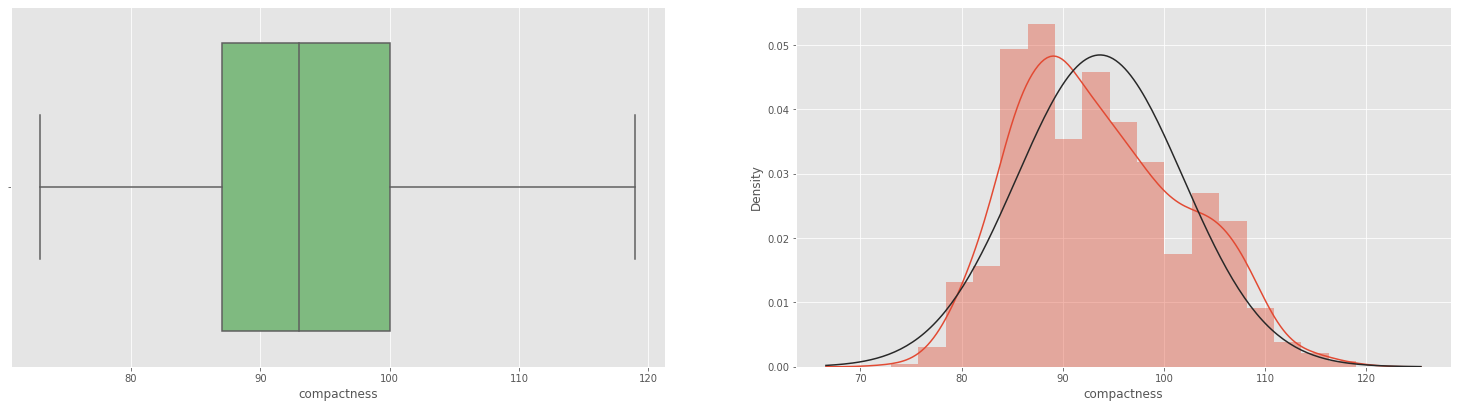

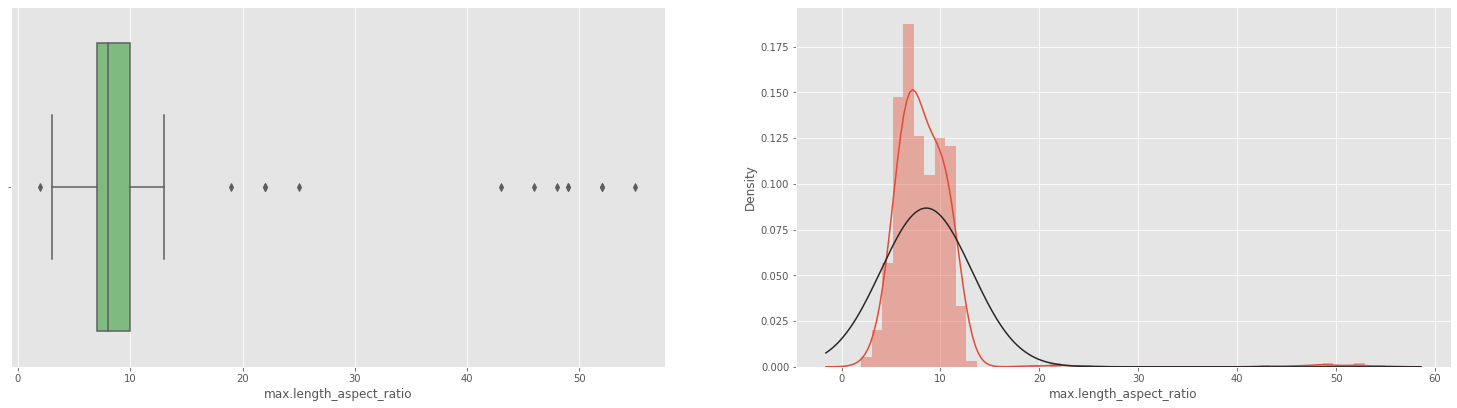

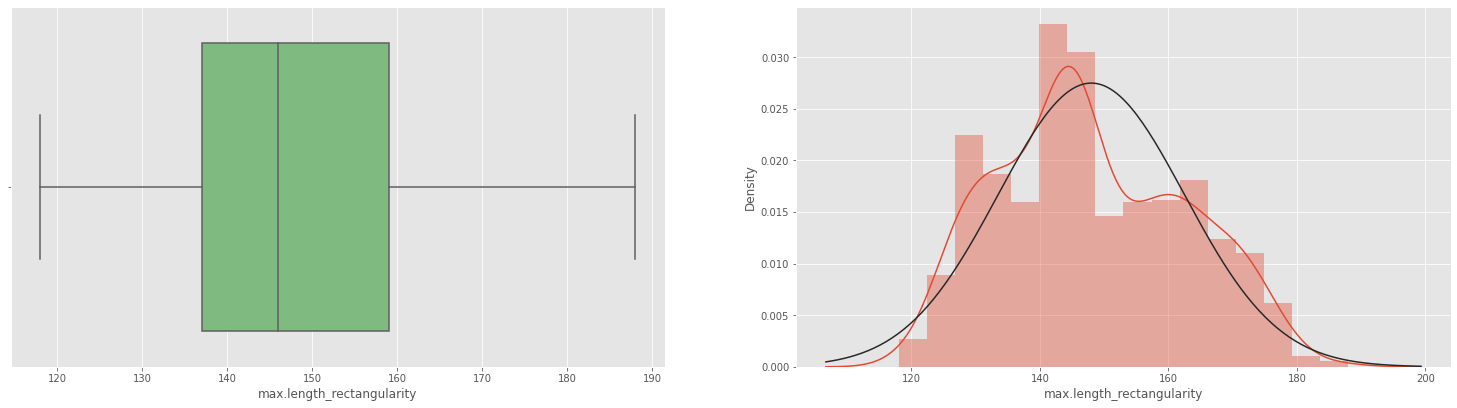

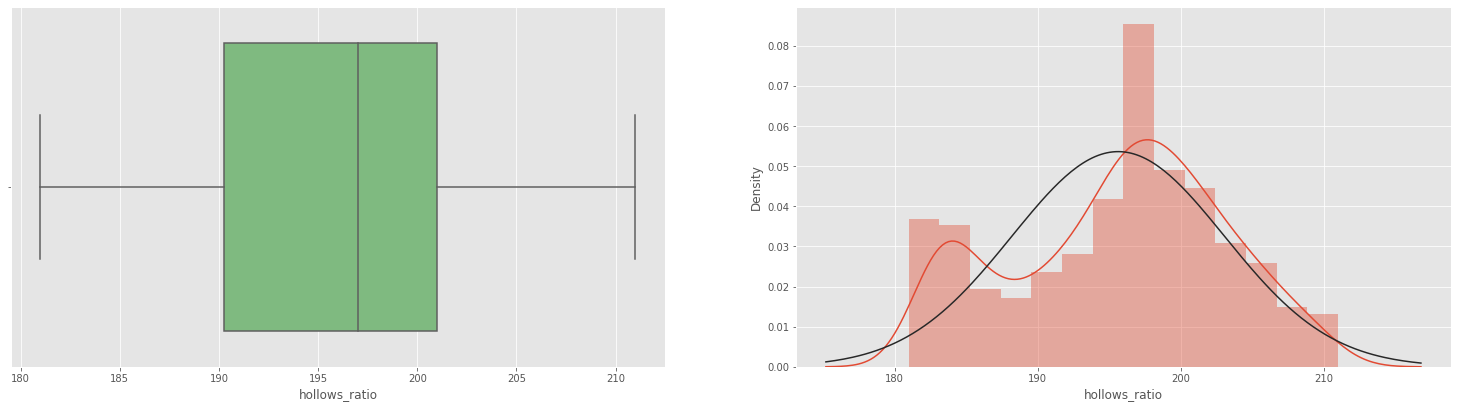

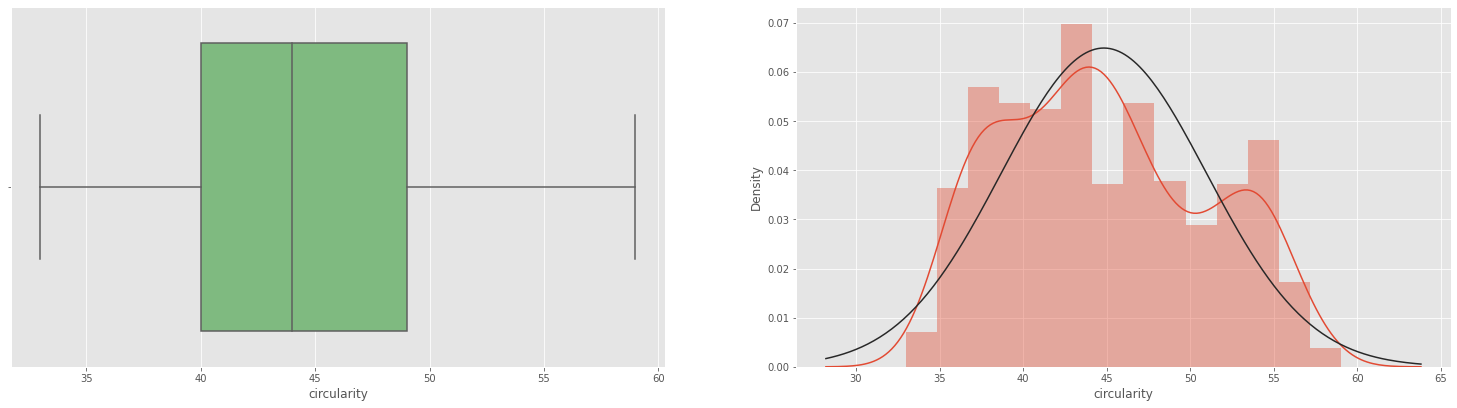

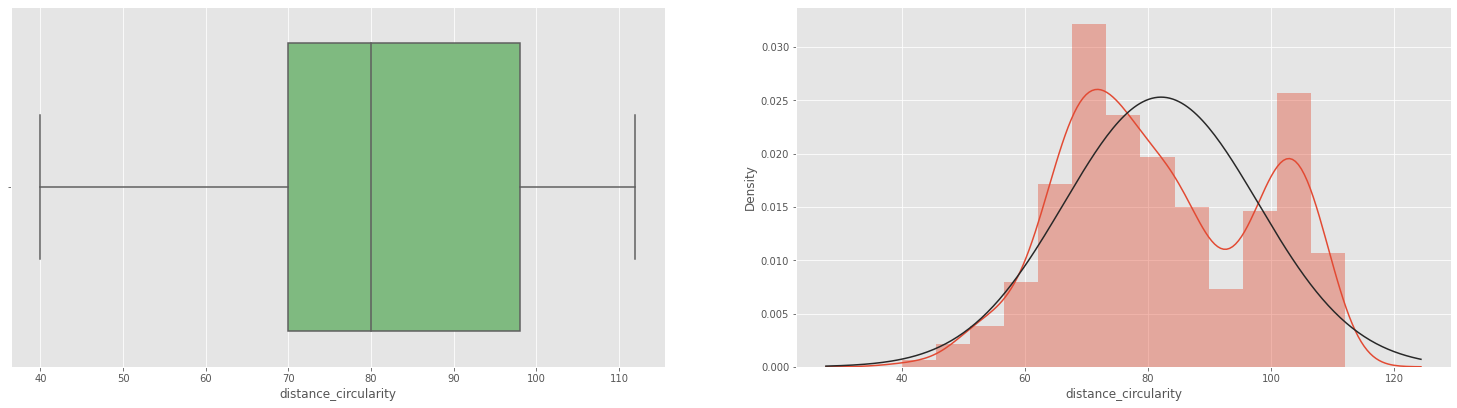

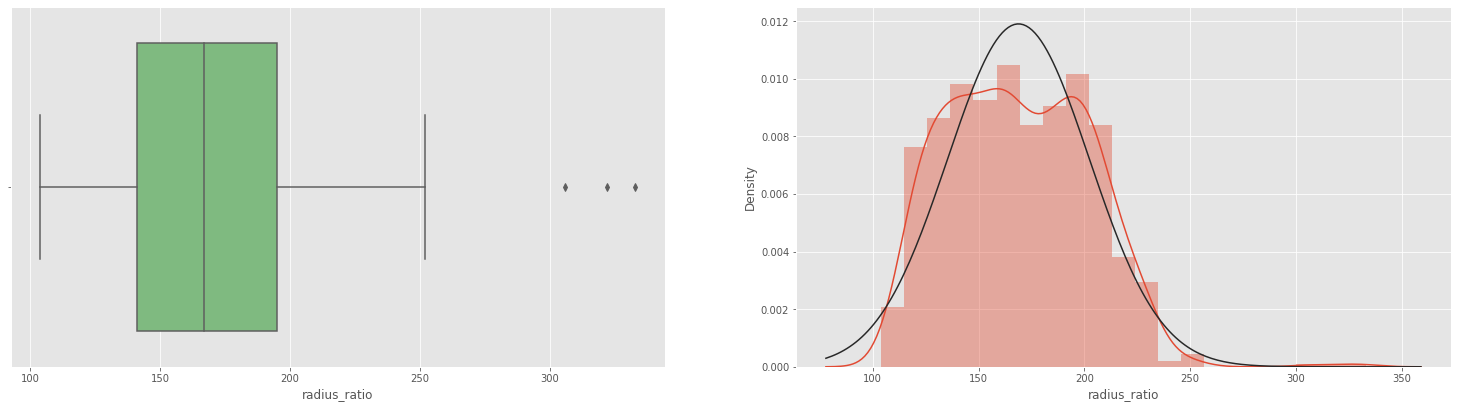

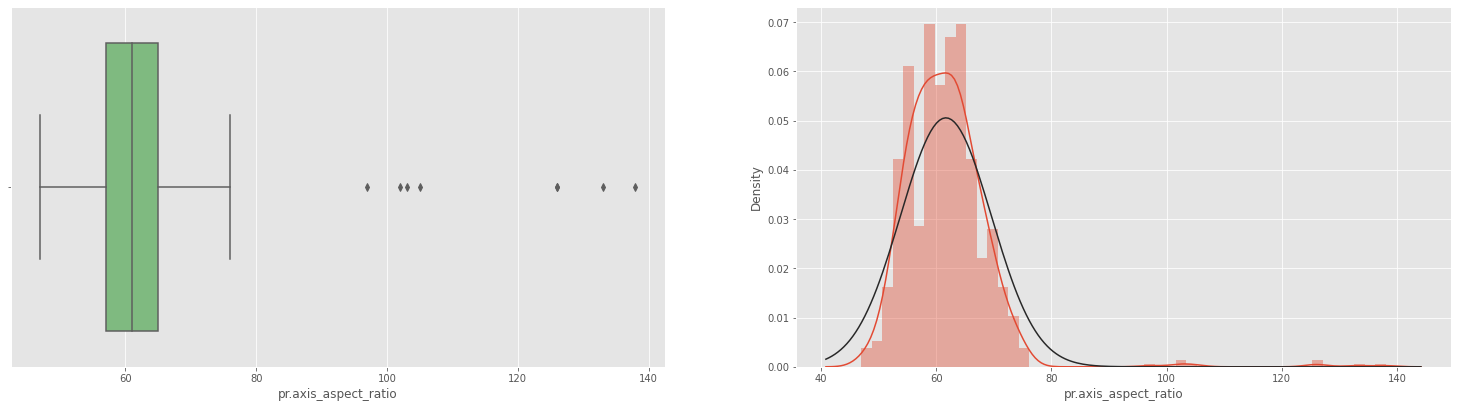

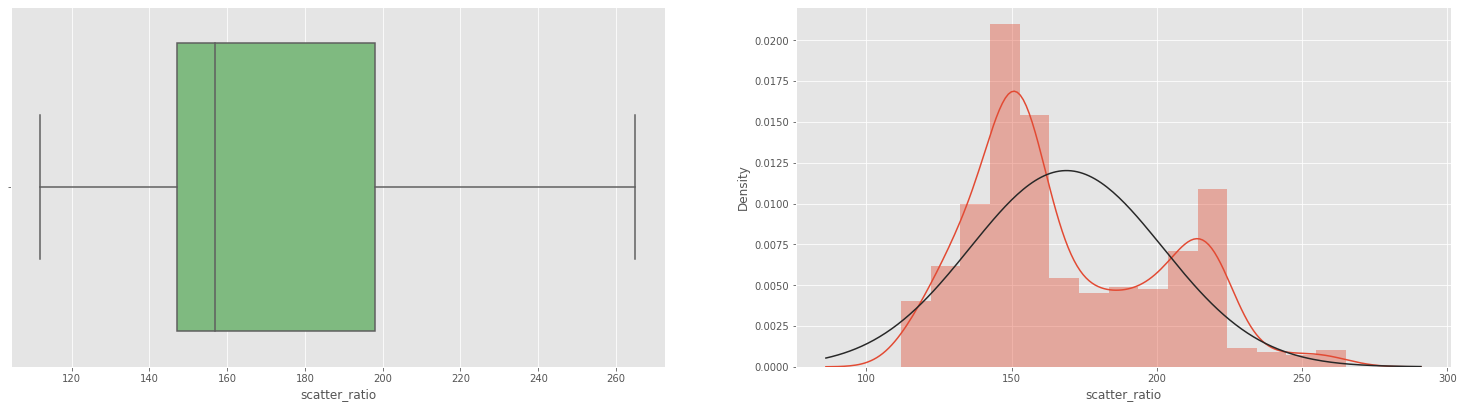

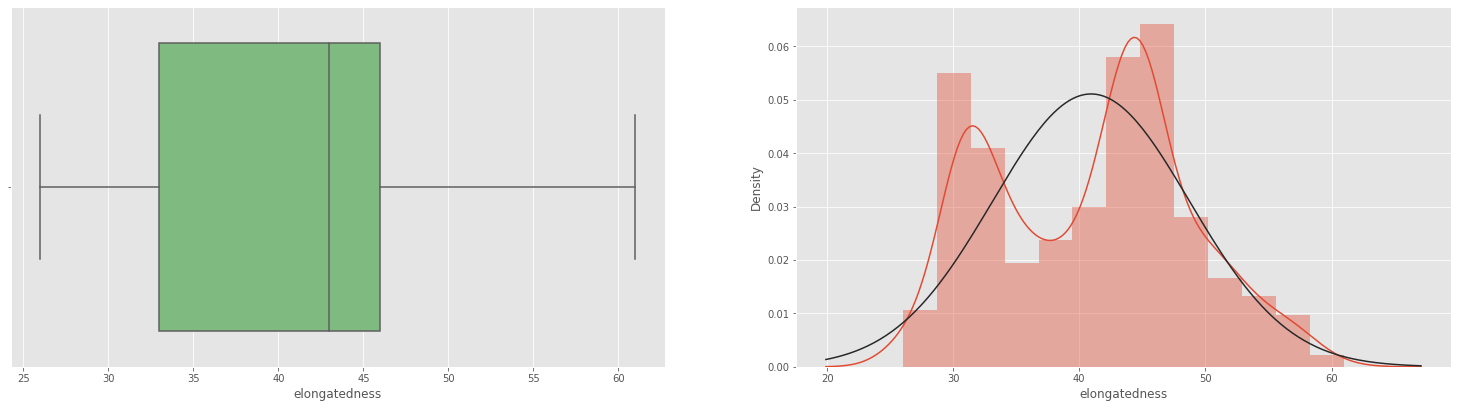

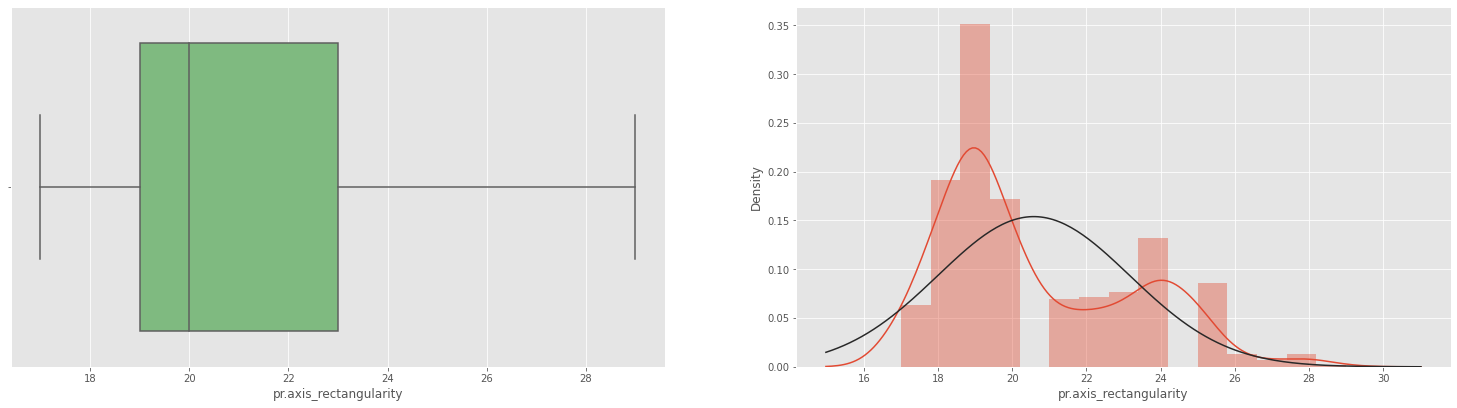

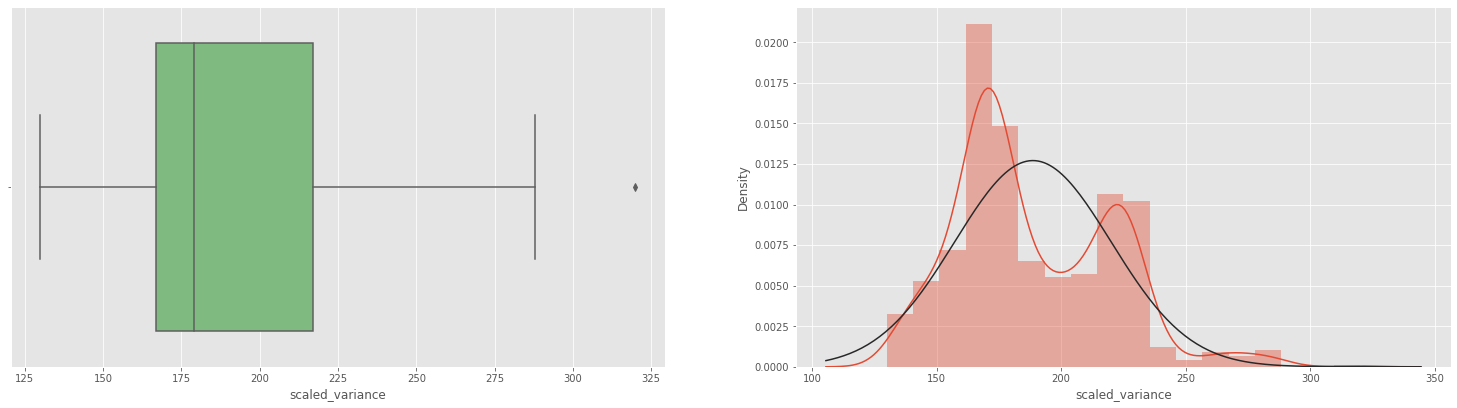

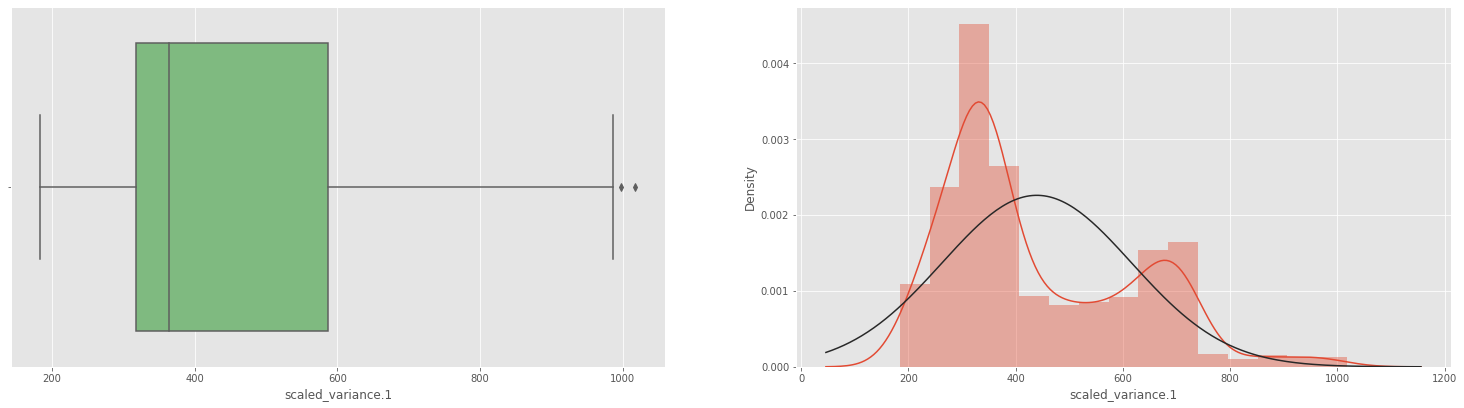

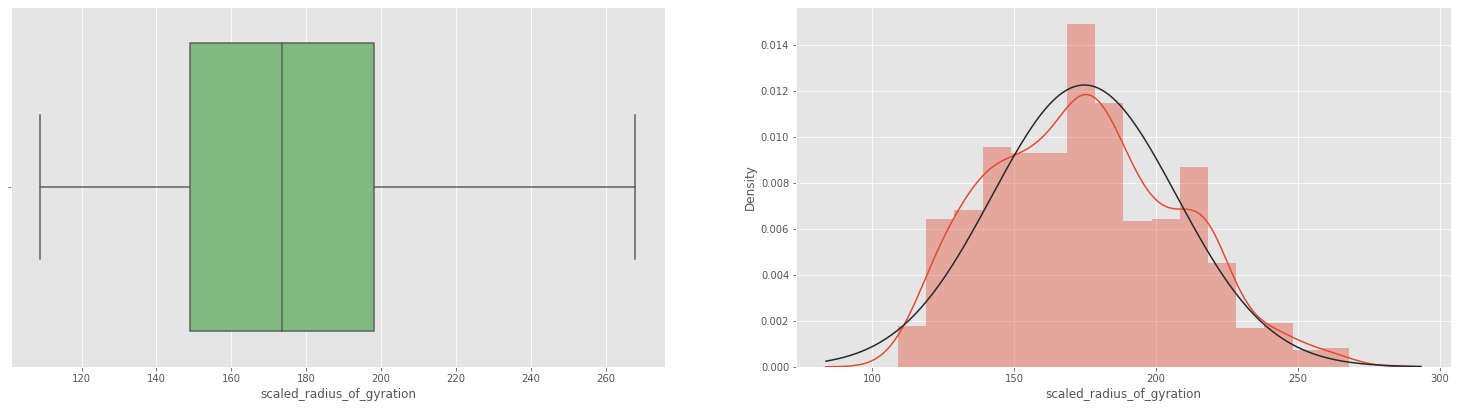

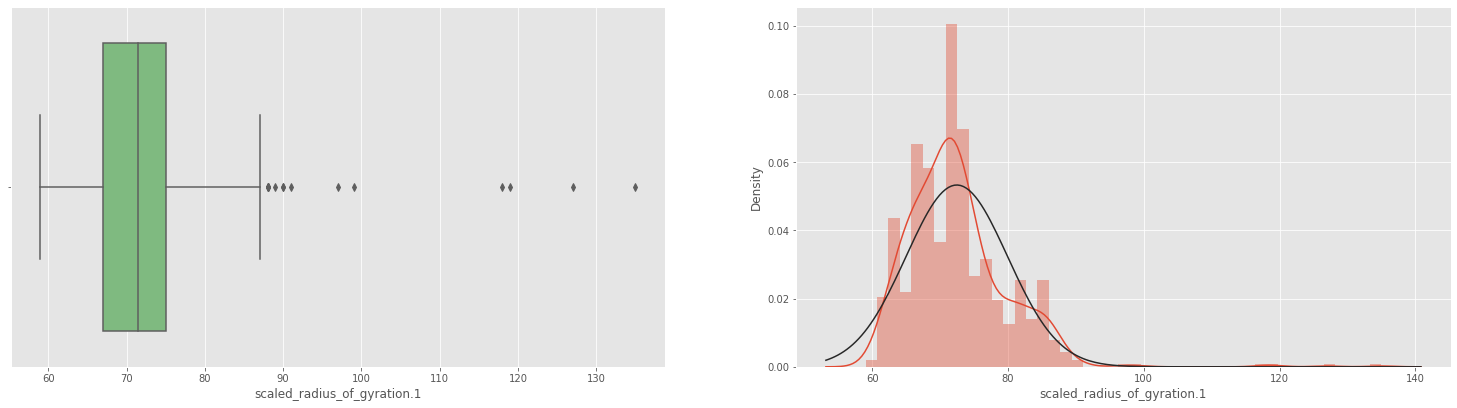

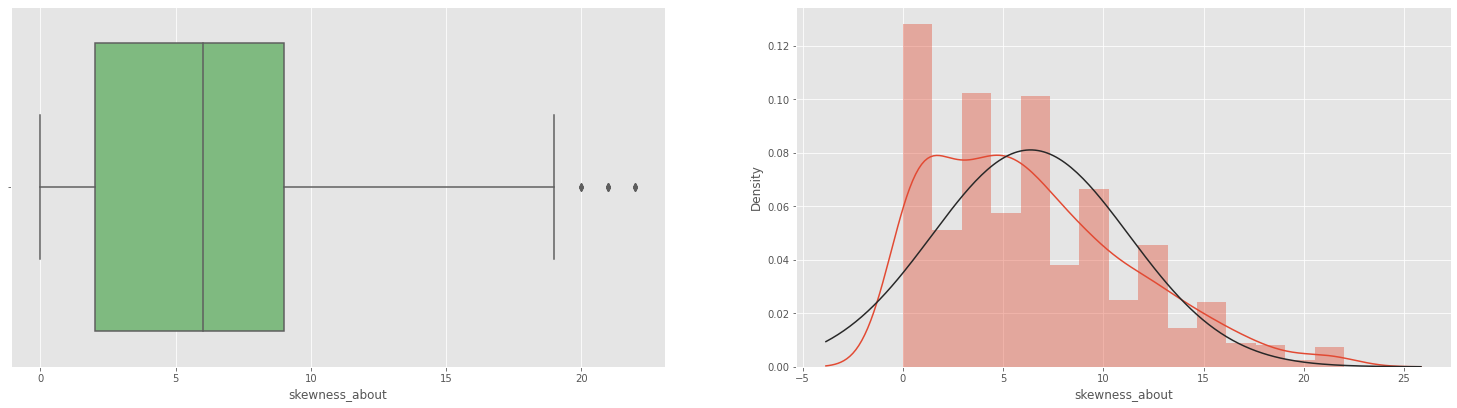

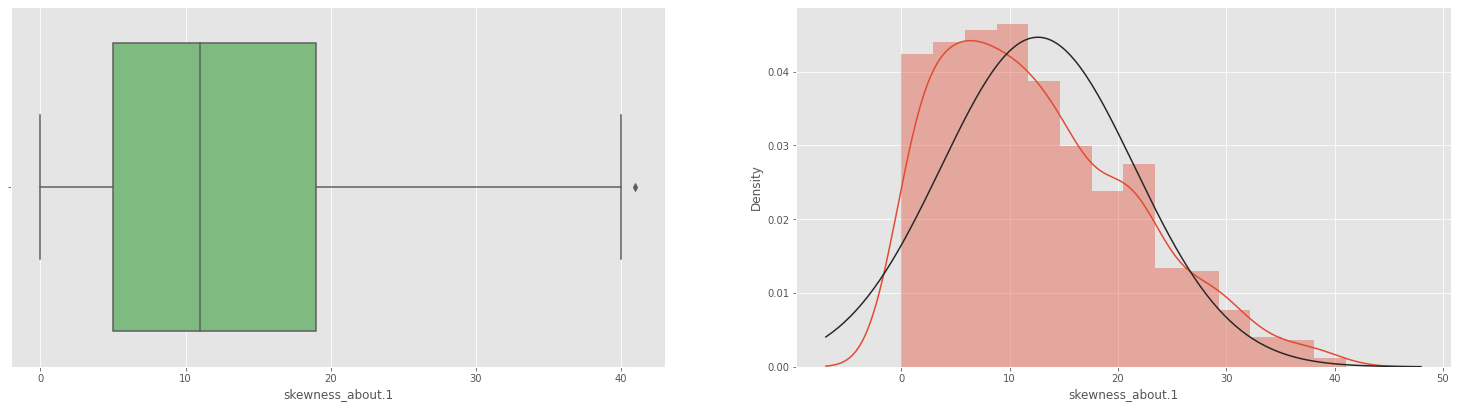

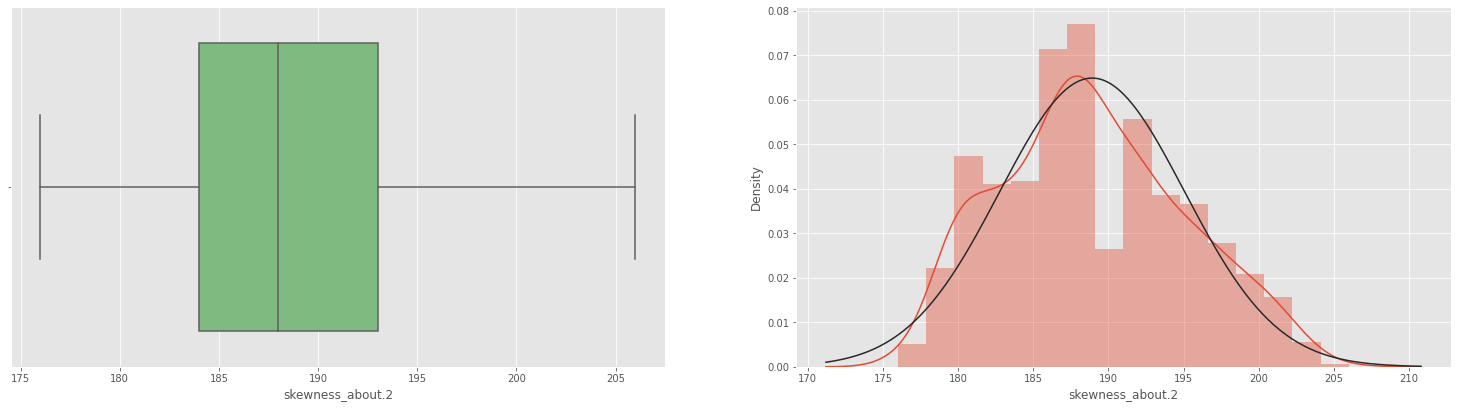

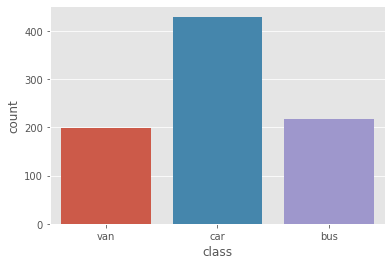

In [ ]:
plot_univariate_features(vehicle)

#### Shapiro Test for Normality check

In [ ]:
normality_test = lambda x: shapiro(x.fillna(0))[1] < 0.01
normal = vehicle_features
normal = normal.apply(normality_test)
print(~normal)

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
dtype: bool


Based on the Shapiro test, we can see that none of the variables are inferred as 'Normally' distributed. 

#### Skewness Check

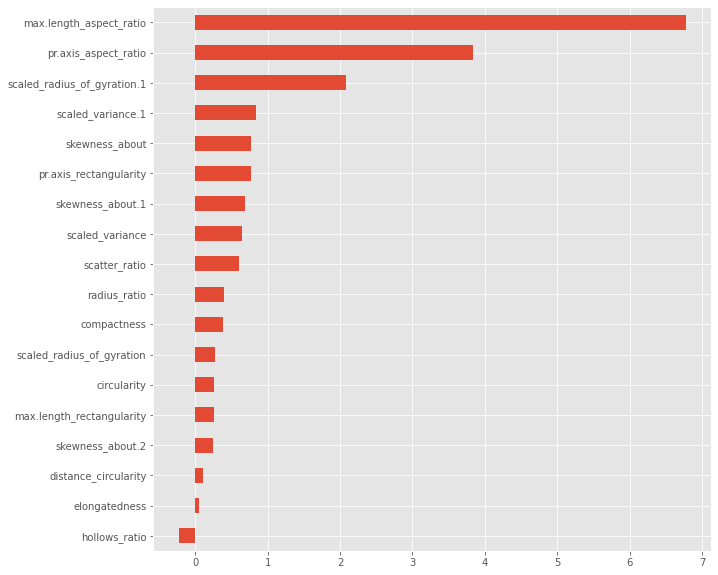

In [ ]:
plt.figure(figsize=(10,10))
vehicle_features.skew().sort_values().plot(kind='barh')
plt.show()

#### Observations:
- `max.length_aspect_ratio`, `pr.axis_aspect_ratio` and `scaled_radius_of_gyration.1` are the features with maximum skewness. 
- Let us do Log transformation for all these features to minimize skewness.

#### Handling Skewness with Log Transform

Before Log Transformation



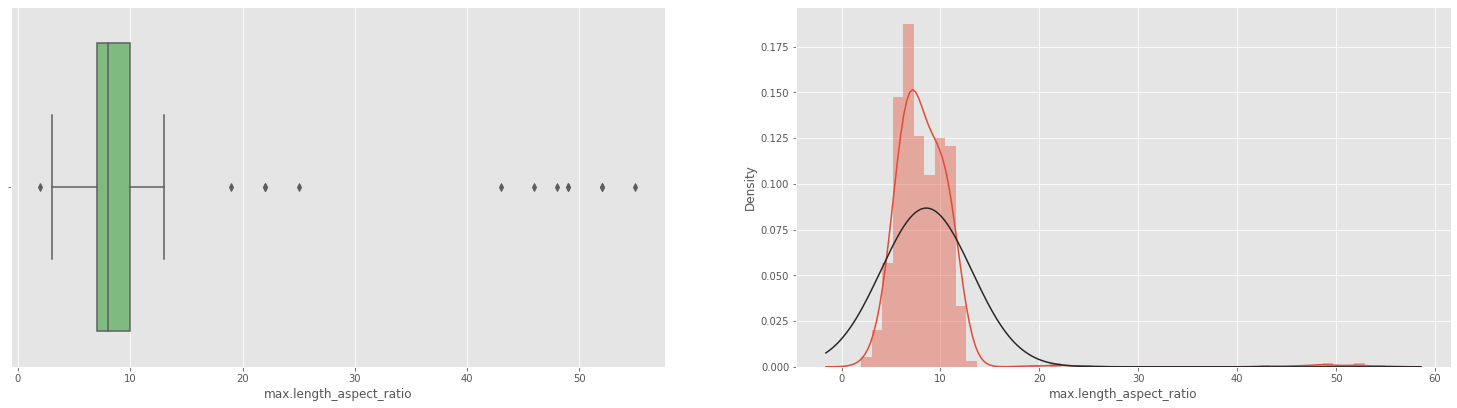

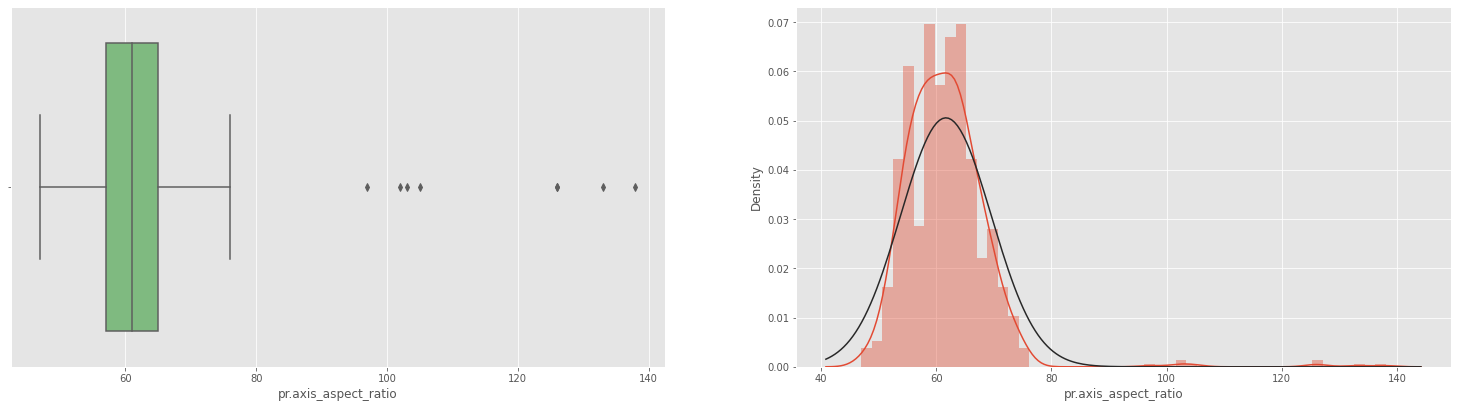

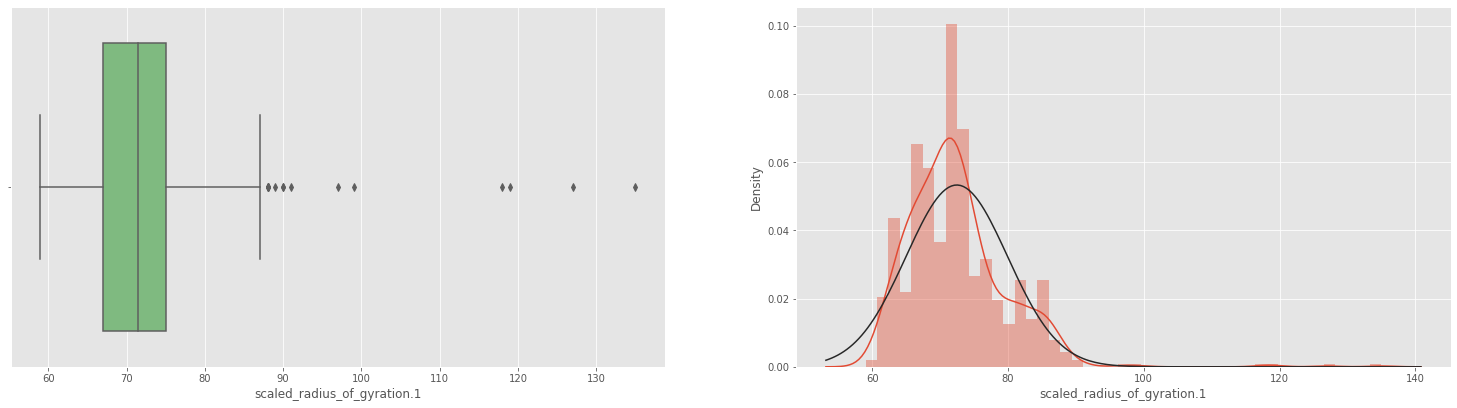

In [ ]:
print("Before Log Transformation\n")
skew_cols = ['max.length_aspect_ratio', 'pr.axis_aspect_ratio', 'scaled_radius_of_gyration.1']
for j in range(0,len(skew_cols)):
    f, axes = plt.subplots(1, 2, figsize=(10, 10))
    sns.boxplot(vehicle[skew_cols[j]], ax = axes[0], palette='Greens_r')
    sns.distplot(vehicle[skew_cols[j]], ax = axes[1], fit=norm)
    plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

In [ ]:
#max.length_aspect_ratio
vehicle['max.length_aspect_ratio'] = np.log(vehicle['max.length_aspect_ratio'])

#pr.axis_aspect_ratio 
vehicle['pr.axis_aspect_ratio'] = np.log(vehicle['pr.axis_aspect_ratio'])

#scaled_radius_of_gyration.
vehicle['scaled_radius_of_gyration.1'] = np.log(vehicle['scaled_radius_of_gyration.1'])

Post Log Transformation



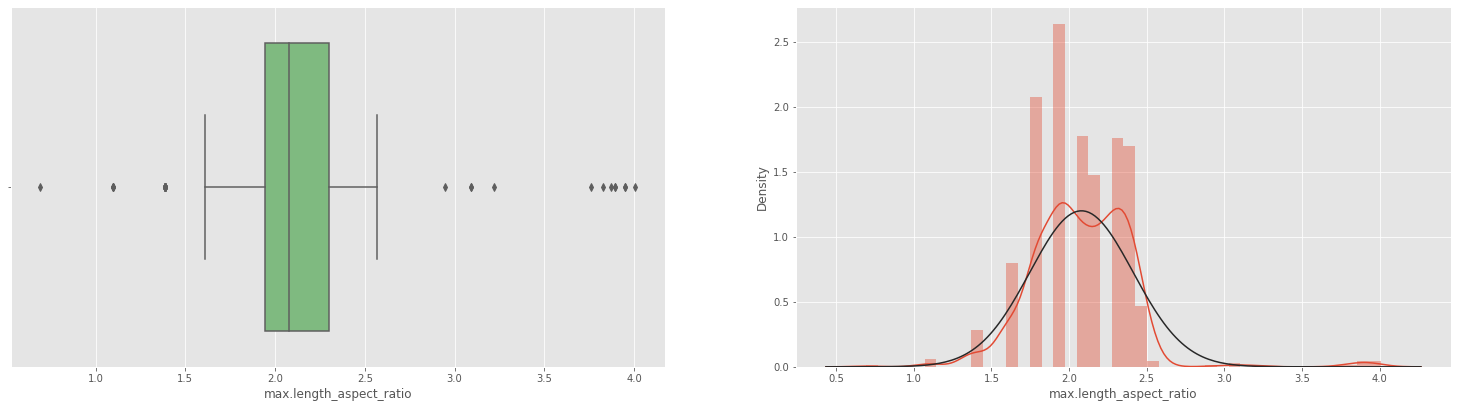

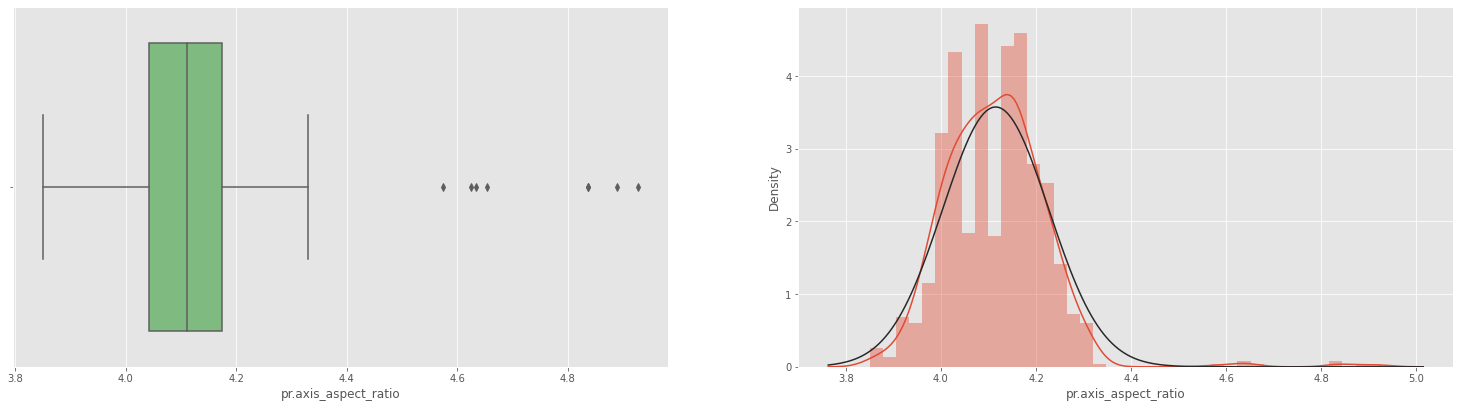

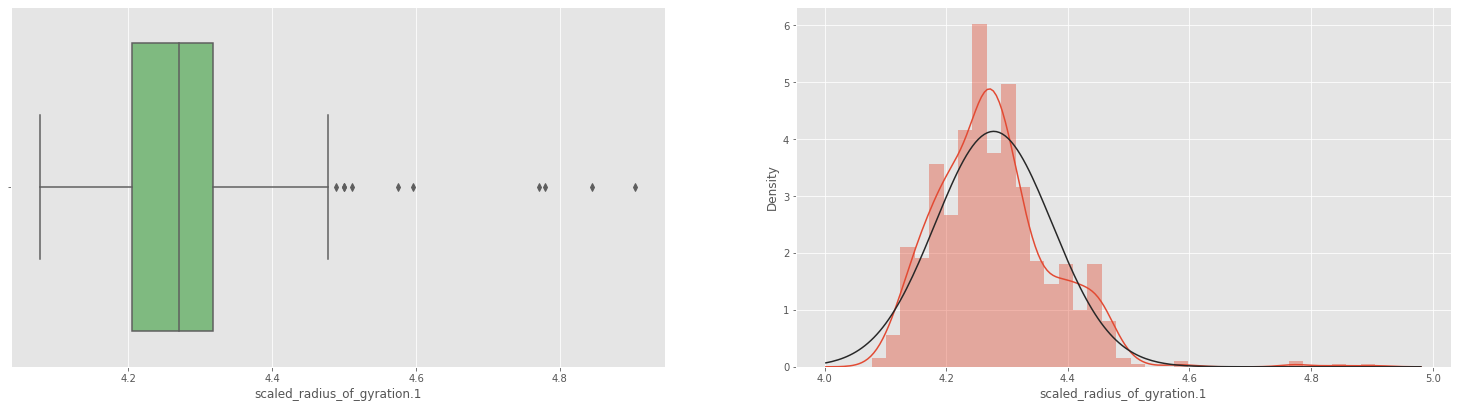

In [ ]:
print("Post Log Transformation\n")
skew_cols = ['max.length_aspect_ratio', 'pr.axis_aspect_ratio', 'scaled_radius_of_gyration.1']
for j in range(0,len(skew_cols)):
    f, axes = plt.subplots(1, 2, figsize=(10, 10))
    sns.boxplot(vehicle[skew_cols[j]], ax = axes[0], palette='Greens_r')
    sns.distplot(vehicle[skew_cols[j]], ax = axes[1], fit=norm)
    plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

#### Imputing Missing Values

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

##### Instantiating KNN Imputer to impute the NaNs

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True)
vehicle.iloc[:,0:-1] = imputer.fit_transform(vehicle.iloc[:,0:-1])

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

#### Outliers Detection & Treatment

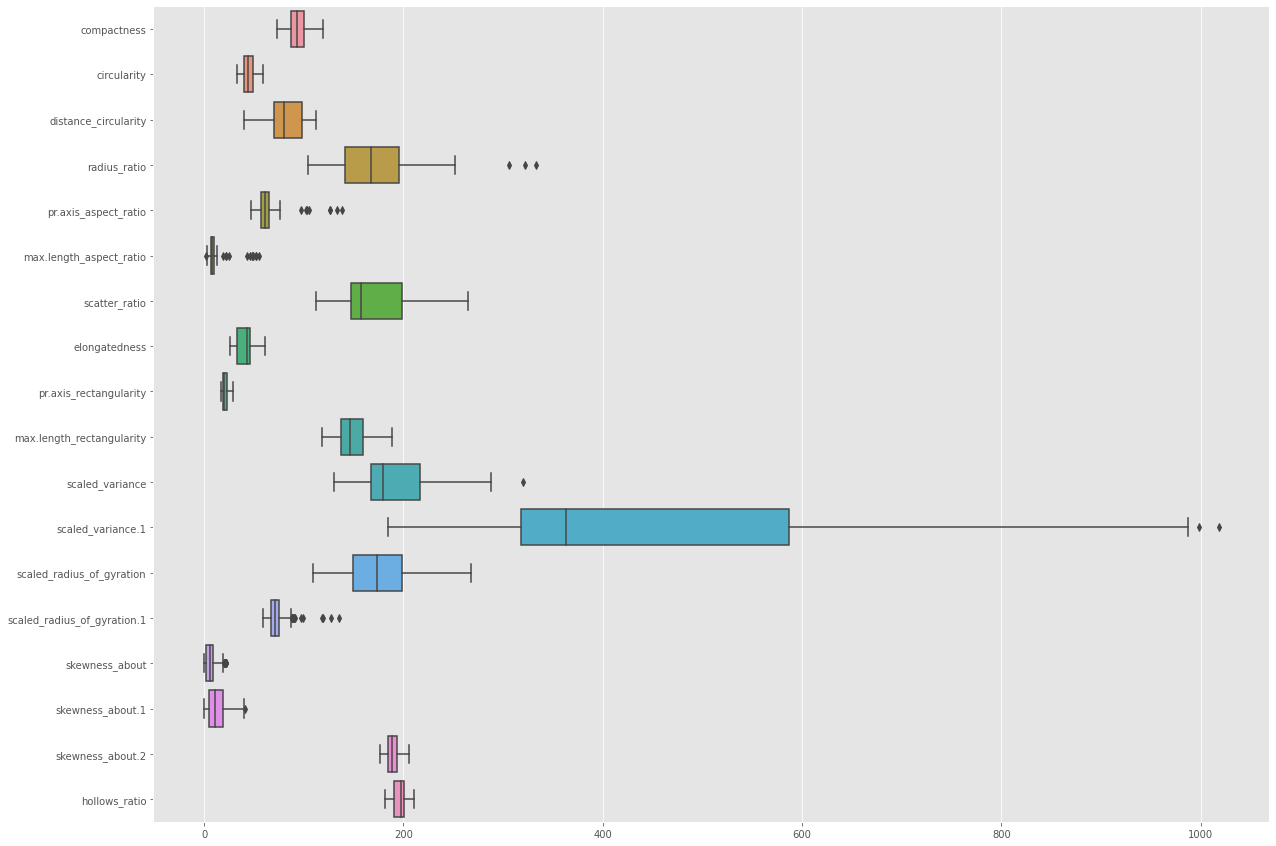

In [ ]:
fig = plt.figure(figsize = (20, 15))
ax = sns.boxplot(data = vehicle_features, orient = 'h')

In [ ]:
def outliers_IQR(df):
  """
  Helper function to detect Outliers in the Dataframe
  Input : Dataframe; Output : Dataframe containing Percentage and Number of Outliers. 
  """
  columns = df.columns
  outliers_list = []
  no_of_outliers = []
  for c in df.columns:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    df_outliers = np.where((df[c] < (Q1 - 1.5 * IQR)) | (df[c] > (Q3 + 1.5 * IQR)))
    no_of_outliers.append(len(df_outliers[0]))
    outliers_list.append(round((len(df_outliers[0]) / len(df[c]) * 100),2))

  print("\n")
  outliers_df = pd.DataFrame({"Percentage_of_Outliers":outliers_list, "No_of_Outliers":no_of_outliers}, index=df.columns)
  return outliers_df.sort_values(by="Percentage_of_Outliers", ascending=False)

In [ ]:
outliers_IQR(vehicle.iloc[:, 0:-1])

Percentage_of_Outliers  No_of_Outliers
max.length_aspect_ratio                        4.14              35
skewness_about                                 1.42              12
scaled_radius_of_gyration.1                    1.18              10
pr.axis_aspect_ratio                           0.95               8
radius_ratio                                   0.35               3
scaled_variance.1                              0.24               2
skewness_about.1                               0.12               1
scaled_variance                                0.12               1
compactness                                    0.00               0
skewness_about.2                               0.00               0
scaled_radius_of_gyration                      0.00               0
max.length_rectangularity                      0.00               0
circularity                                    0.00               0
pr.axis_rectangularity                         0.00               0
elongatedness                                  0.00               0
scatter_ratio                                  0.00               0
distance_circularity                           0.00               0
hollows_ratio                                  0.00               0

In [ ]:
# Removing outliers (data points beyond 1.5xIQR)

for col in vehicle.iloc[:, 0:-1].columns:
    Q1 = vehicle[col].quantile(0.25)
    Q3 = vehicle[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR
    vehicle.loc[(vehicle[col] > upper_lim), col] = np.nan
    vehicle.loc[(vehicle[col] < lower_lim), col] = np.nan

print('Outliers are set to NaN')
print('Number of rows impacted due to Outlier treatment : ', vehicle.isnull().any().sum())

Outliers are set to NaN
Number of rows impacted due to Outlier treatment :  8


In [ ]:
#Imputing the Outlier NaNs with Median values

vehicle.iloc[:, 0:-1] = vehicle.iloc[:, 0:-1].apply(lambda x: x.fillna(x.median()),axis=0)
vehicle.sample(3)

compactness  circularity  ...  hollows_ratio  class
368         84.0         45.0  ...          187.0    bus
789         90.0         39.0  ...          192.0    car
187         98.0         45.0  ...          196.0    car

[3 rows x 19 columns]

In [ ]:
vehicle.isnull().any().sum()

0

Dataframe post Outlier Treatment



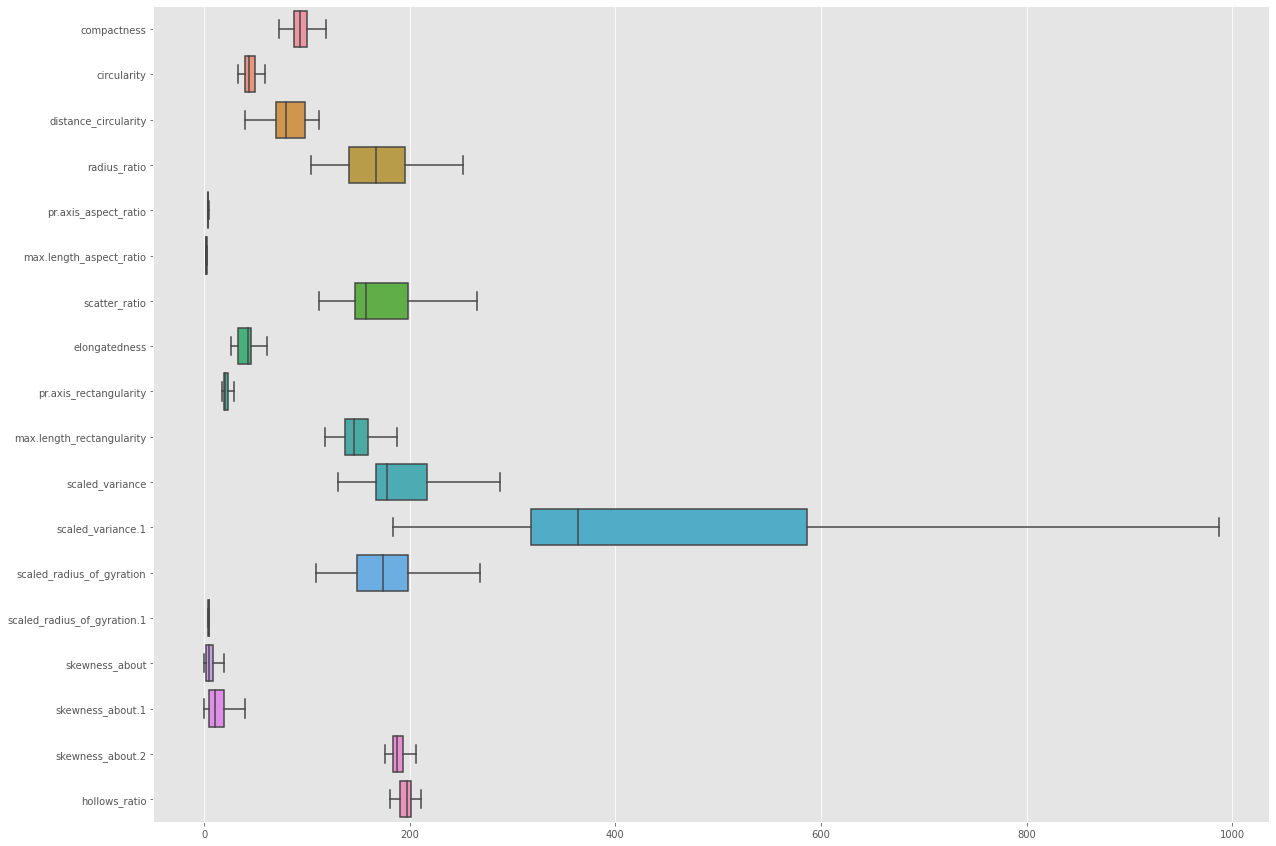

In [ ]:
print('Dataframe post Outlier Treatment\n')
fig = plt.figure(figsize = (20, 15))
ax = sns.boxplot(data = vehicle, orient = 'h')

#### Visualising the Target variable `class`

In [ ]:
vehicle['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

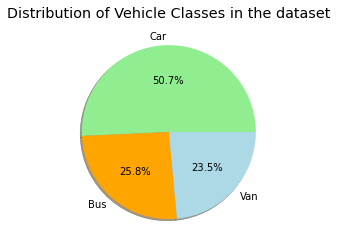

In [ ]:
colors = ["lightgreen", "orange", "lightblue"]
labels = ['Car', 'Bus', 'Van']
plt.pie(vehicle['class'].value_counts(), labels = labels, colors = colors, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Vehicle Classes in the dataset")
plt.show()

We can see that the three classes are not balanced. 'Car' is the majority class with 50% of the total values whereas 'Bus' has 26% and 'Van' has 24% distribution. 

#### Multivariate Analysis

In [ ]:
def plot_predictor_target_features(df):
  """
  Helper function to plot multivariate features.
  Input : Dataframe; Output : One-to-Many Multivariate plots for Predictors vs Target feature. 
  """
  print("All Columns = ",df.columns)
  predictor_cols = pd.Series(df.columns)
  for j in range(0,len(predictor_cols)):
    f, axes = plt.subplots(1, 2, figsize=(10, 10))
    sns.boxplot(y=df[predictor_cols[j]], x=vehicle['class'], ax = axes[0], palette='Accent')
    sns.swarmplot(y=df[predictor_cols[j]], x=vehicle['class'], ax = axes[0], palette='Dark2')
    sns.violinplot(y=df[predictor_cols[j]], x=vehicle['class'], ax = axes[1], palette='YlGn')
    plt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

In [ ]:
plot_predictor_target_features(vehicle.iloc[:,0:-1])

Output hidden; open in https://colab.research.google.com to view.

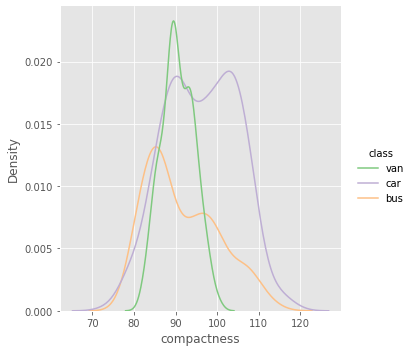

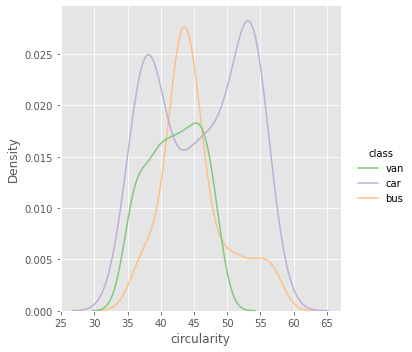

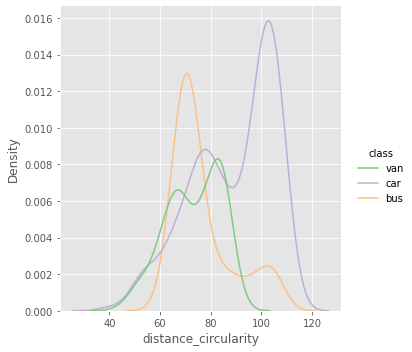

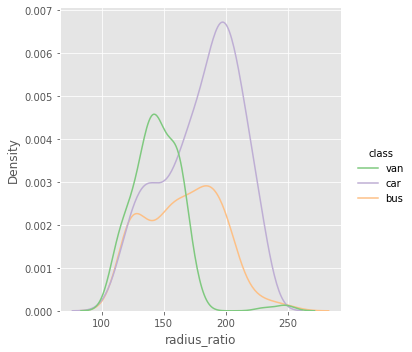

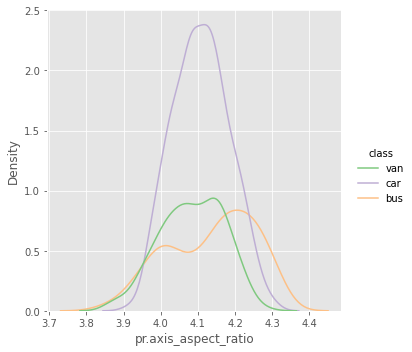

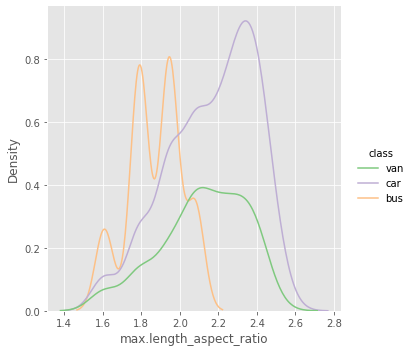

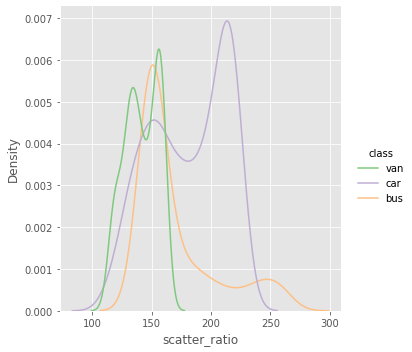

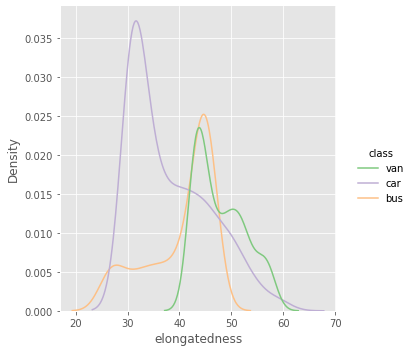

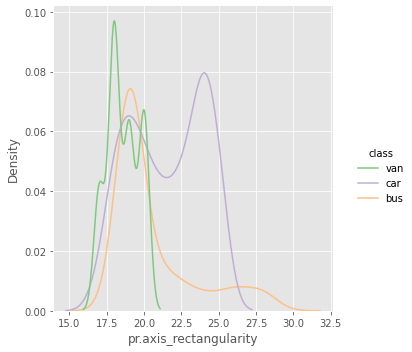

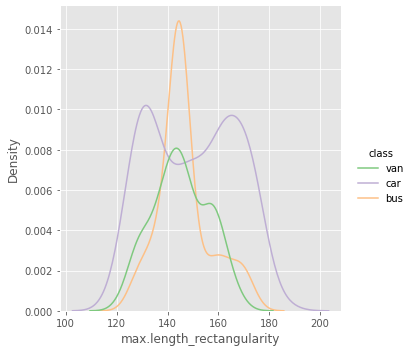

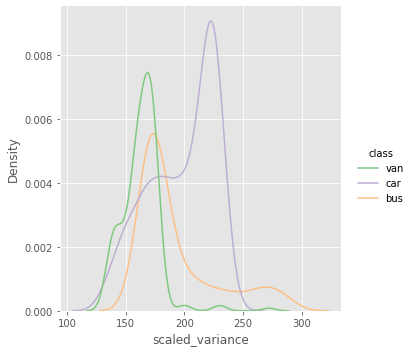

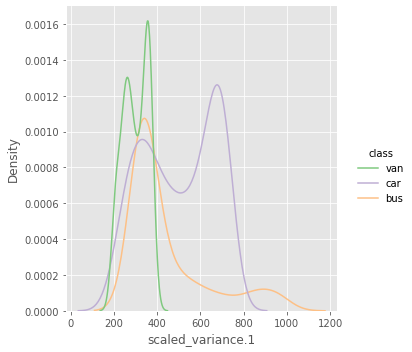

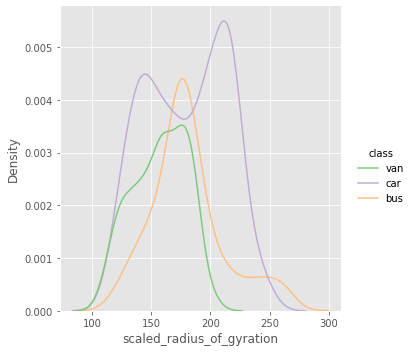

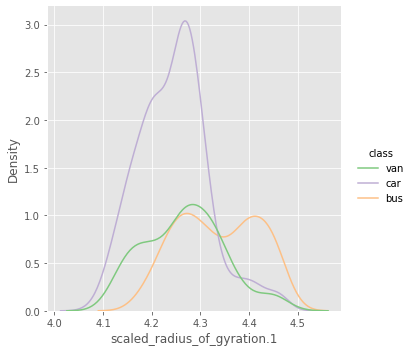

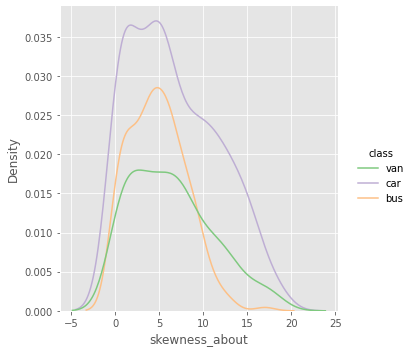

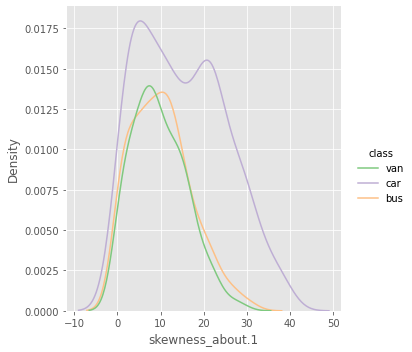

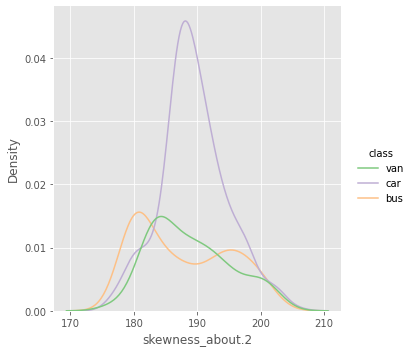

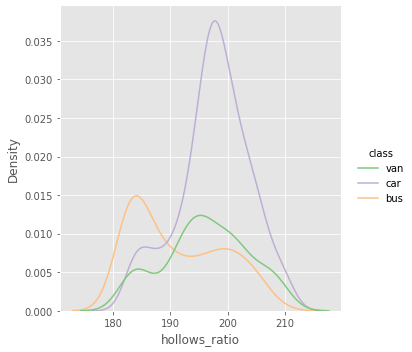

In [ ]:
predictor_cols = pd.Series(vehicle_features.columns)
for j in range(0,len(predictor_cols)):
    sns.displot(x=vehicle[predictor_cols[j]], hue=vehicle['class'], kind='kde', palette='Accent');

#### Observations from KDE Plots:
KDE Plots of `skewness_about`, `skewness_about.1` and `skewness_about.2` show that these are very weak predictors of the Target variables. 
We will check the Pairplot and Correlation Matrix further and decide on the Feature Selection. 

#### Pairplot of all variables in the dataset

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(vehicle, hue='class', diag_kind = 'kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Let us Label Encode the `class` target variable

In [ ]:
#taking a copy
vehicle_encoded = vehicle.copy(deep = True)

#Converting the categorical variable values into numerical values for analysis
vehicle_encoded[['class']] = vehicle_encoded[['class']].apply(LabelEncoder().fit_transform)

vehicle_encoded.head()

compactness  circularity  ...  hollows_ratio  class
0         95.0         48.0  ...          197.0      2
1         91.0         41.0  ...          199.0      2
2        104.0         50.0  ...          196.0      1
3         93.0         41.0  ...          207.0      2
4         85.0         44.0  ...          183.0      0

[5 rows x 19 columns]

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(vehicle_encoded, diag_kind = 'kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### Correlation Matrix

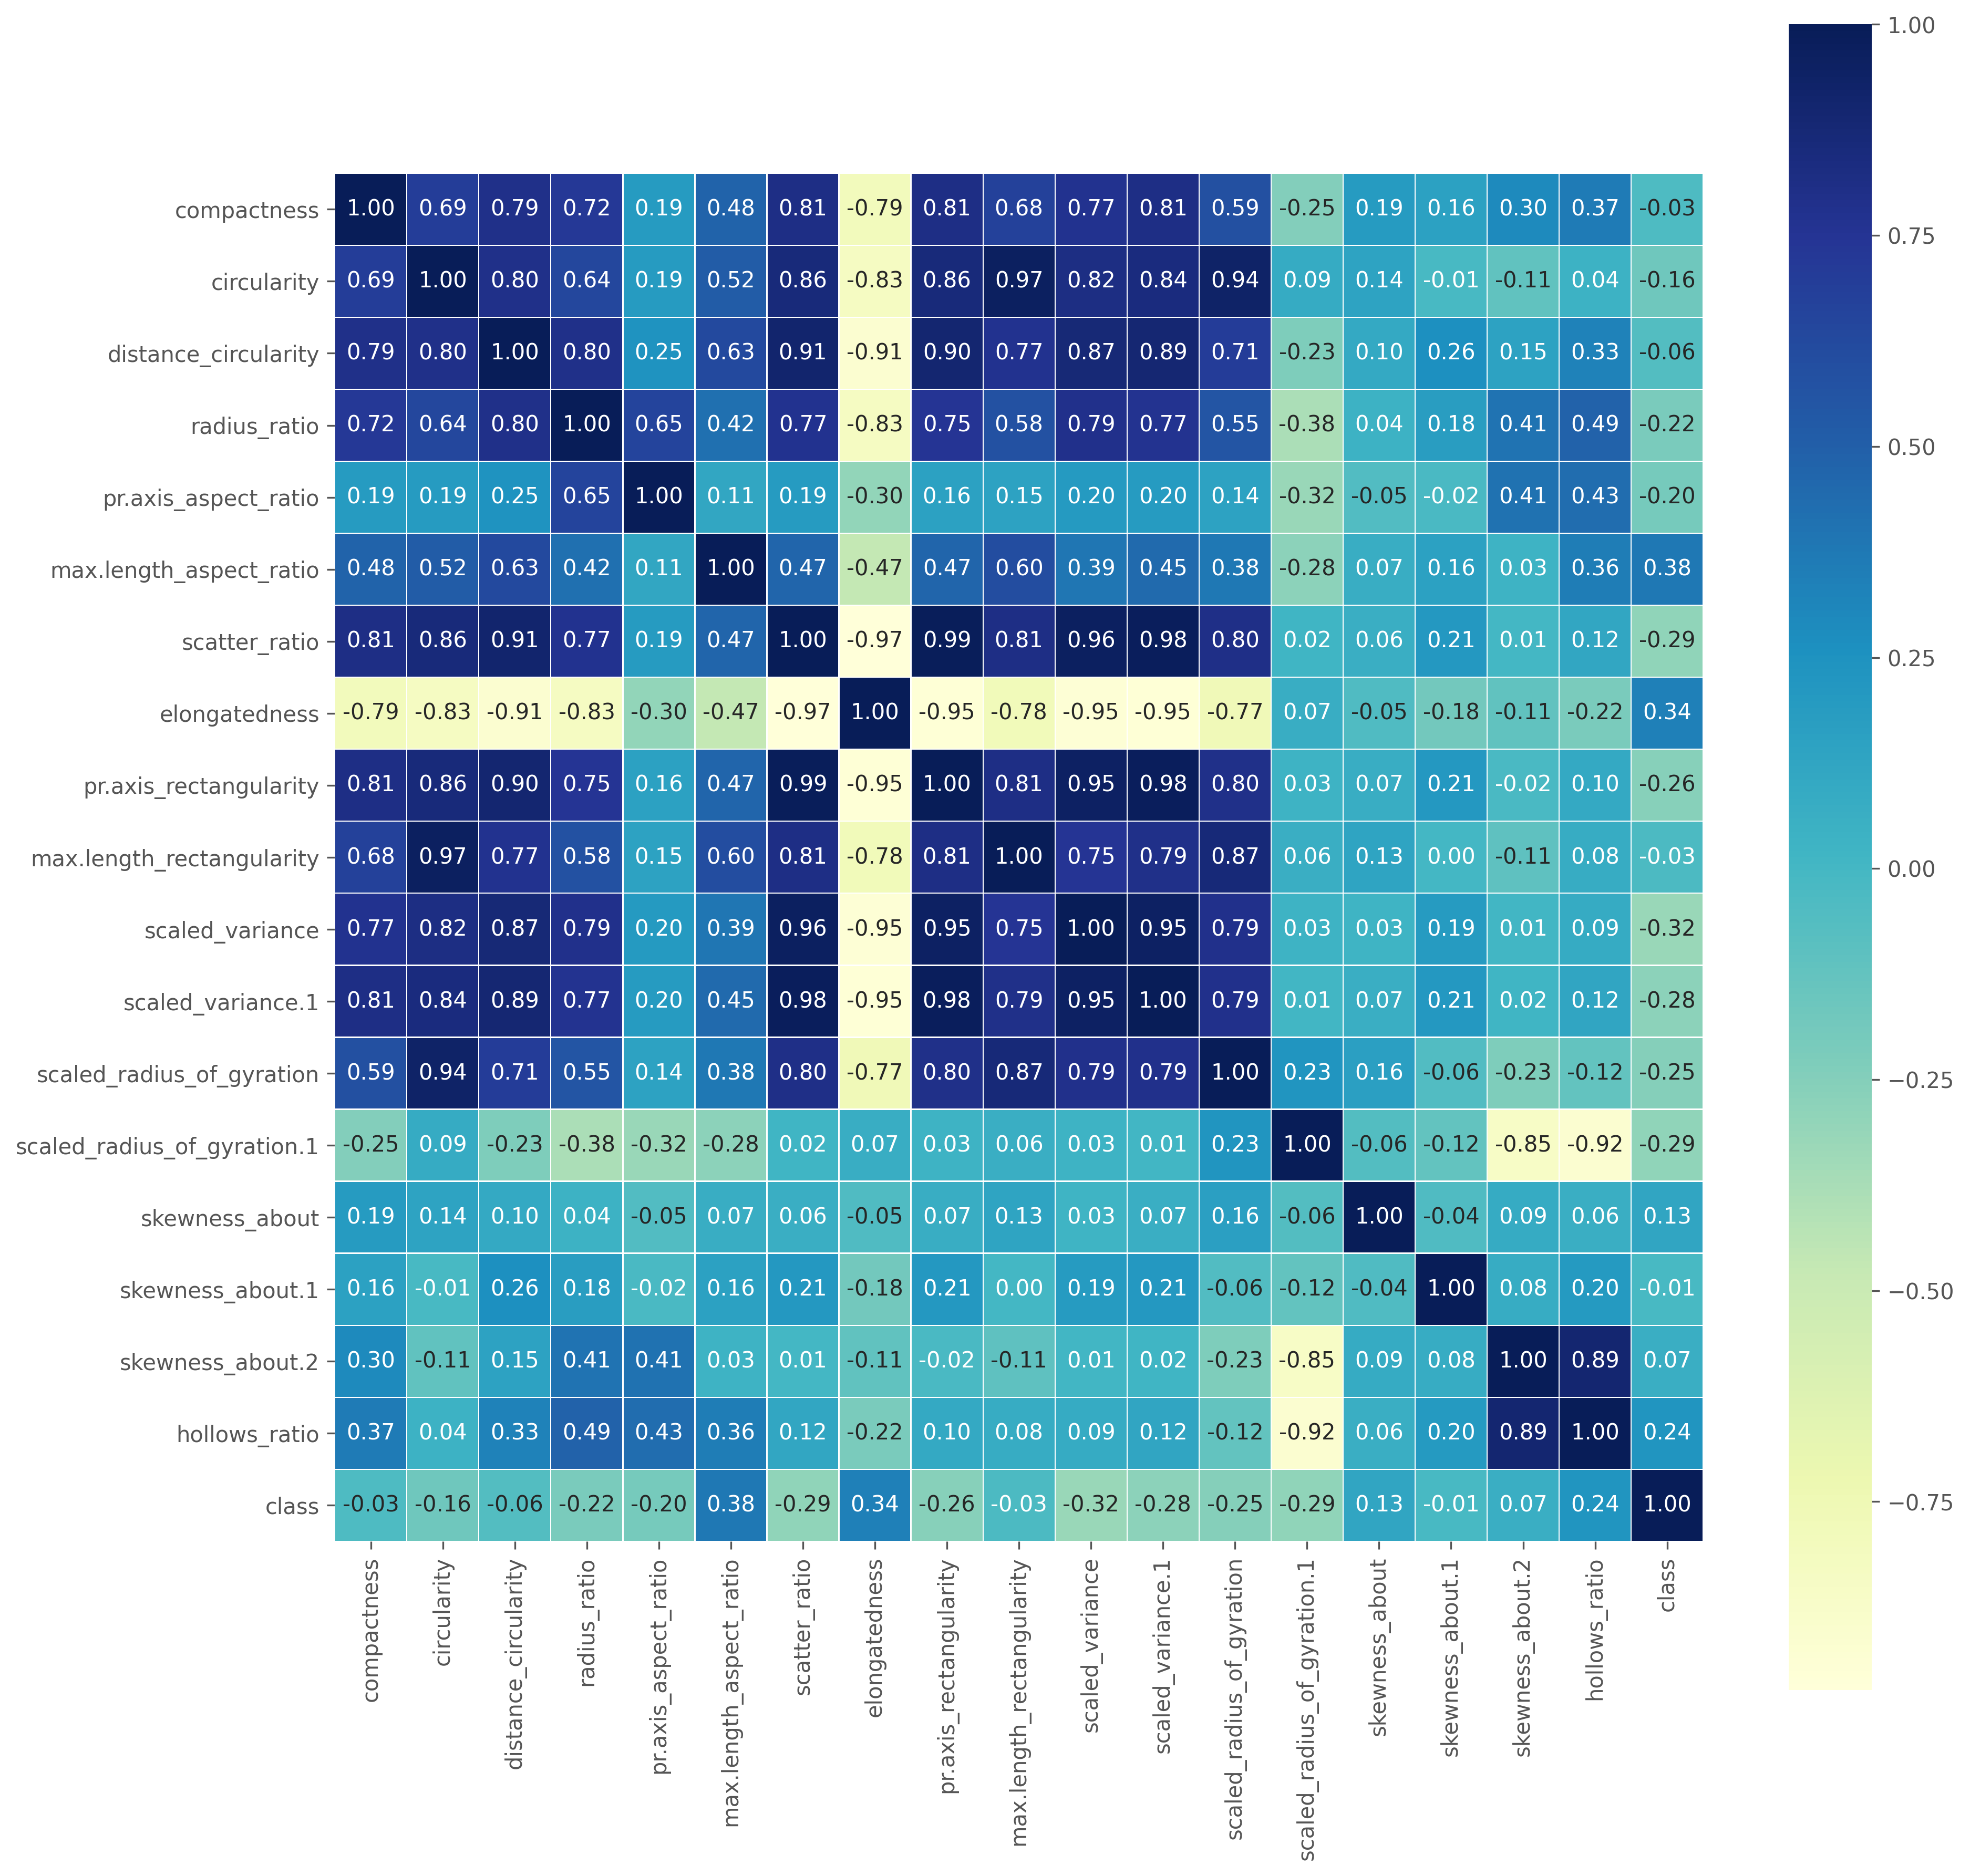

In [ ]:
plt.figure(figsize=(14,14), dpi=300)
sns.heatmap(vehicle_encoded.corr(), annot=True, linewidths = 0.3, fmt = '0.2f', cmap = 'YlGnBu', square=True)
plt.show()

#### Highly correlated features with target variable `class`

<Figure size 1080x1080 with 0 Axes>

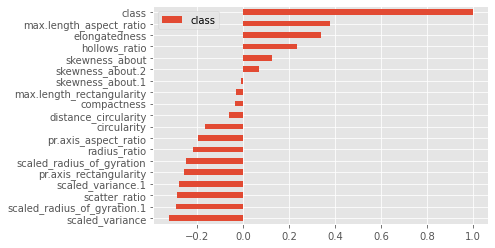

In [ ]:
plt.figure(figsize=(15,15))
vehicle_encoded.corr()[['class']].sort_values(by='class', ascending=True).plot(kind='barh')
plt.show()

#### Highly correlated Independent variables

In [ ]:
#Identifying highly correlated Independent variables (Predictors)
high_corr_var = vehicle_encoded.corr().abs().unstack() #abs() considers absolute values of correlation coefficients.
high_corr_var = high_corr_var.sort_values(kind = "quicksort", ascending = False)
print('No of highly correlated instances : ',len(high_corr_var[(high_corr_var > 0.8) & (high_corr_var < 1)])) 
print("\n")
print("Percentage of multicollinear variables : ", (len(high_corr_var[(high_corr_var > 0.8) & (high_corr_var < 1)]) / len(vehicle_encoded) * 100))
print("\n")
print(high_corr_var[(high_corr_var > 0.8) & (high_corr_var < 1)])

No of highly correlated instances :  66


Percentage of multicollinear variables :  7.801418439716312


scatter_ratio              pr.axis_rectangularity       0.992092
pr.axis_rectangularity     scatter_ratio                0.992092
scaled_variance.1          scatter_ratio                0.983789
scatter_ratio              scaled_variance.1            0.983789
pr.axis_rectangularity     scaled_variance.1            0.977811
                                                          ...   
compactness                scaled_variance.1            0.810787
scatter_ratio              max.length_rectangularity    0.810635
max.length_rectangularity  scatter_ratio                0.810635
scaled_radius_of_gyration  scatter_ratio                0.800816
scatter_ratio              scaled_radius_of_gyration    0.800816
Length: 66, dtype: float64


#### Detecting Multicollinear features using Variance Inflation Factor (VIF)

In [ ]:
def calculate_vif(X):
    vif_features = pd.DataFrame()
    vif_features["Features"] = X.columns
    vif_features["VIF Score"] = [vif(X.values, i) for i in range(X.shape[1])]
    return(vif_features)

In [ ]:
vif_df = calculate_vif(vehicle_encoded)
vif_df.sort_values(by='VIF Score', ascending=False)

Features     VIF Score
16             skewness_about.2  12356.319400
17                hollows_ratio  12017.987632
4          pr.axis_aspect_ratio  10819.365916
13  scaled_radius_of_gyration.1   9533.251509
6                 scatter_ratio   6533.558880
8        pr.axis_rectangularity   5819.253255
1                   circularity   2939.460797
9     max.length_rectangularity   2842.278874
7                 elongatedness   1181.026346
10              scaled_variance    987.849184
0                   compactness    701.598457
3                  radius_ratio    557.453952
12    scaled_radius_of_gyration    401.919982
2          distance_circularity    371.668954
5       max.length_aspect_ratio    284.125985
11            scaled_variance.1    238.725901
18                        class      9.033245
15             skewness_about.1      4.712261
14               skewness_about      3.467148

#### Observations from the Multivariate Analysis & Correlation Matrix:
- We can observe that most of the features are highly correlated with each other, exhibiting Multicollinearity.
- `skewness_about`, `skewness_about.1` and `skewness_about.2` show that these are very weak predictors of the Target variables. We can drop them during Feature Subset Selection.
- Similarly, `compactness` and `max.length_rectangularity` can be dropped due to near-zero correlation with the Target variable. 
- `scatter_ratio` has high correlation with 9 out of the remaining 17 predictor features. This can also be seen from the very high VIF score for the variable. This variable can be dropped from the Feature Subset Selection since it exhibits Multicollinearity and the same information can be derived from other features.
- `elongatedness` exhibits Strong Negative Correlation with all other variables. 

### Unsupervised Learning Methods for EDA

In [ ]:
#Temporarily scaling the data using zscore for Unsupervised Learning EDA
#StandardScaler will be used before actual model building

vehicle_scaled = vehicle_encoded.iloc[:,0:-1].apply(zscore)
vehicle_scaled.head(3)

compactness  circularity  ...  skewness_about.2  hollows_ratio
0     0.160580     0.508521  ...         -0.313207       0.183957
1    -0.325470    -0.626680  ...          0.011874       0.452977
2     1.254193     0.832864  ...         -0.150667       0.049447

[3 rows x 18 columns]

#### Cophenetic Correlation Coefficient

In [ ]:
Z = linkage(vehicle_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(vehicle_scaled))

print("Cophenetic Correlation Coefficient (Complete) : ", c.round(4))

Cophenetic Correlation Coefficient (Complete) :  0.6924


In [ ]:
Z = linkage(vehicle_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(vehicle_scaled))

print("Cophenetic Correlation Coefficient (Average) : ", c.round(4))

Cophenetic Correlation Coefficient (Average) :  0.7034


In [ ]:
Z = linkage(vehicle_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(vehicle_scaled))

print("Cophenetic Correlation Coefficient (Average) : ", c.round(4))

Cophenetic Correlation Coefficient (Average) :  0.6862


Average linkage seems to be the better choice of Clustering for the given Dataset, inferred from the corresponding higher Cophenetic Correlation coefficient value of 0.70.

#### Dendograms to understand Feature Dependence

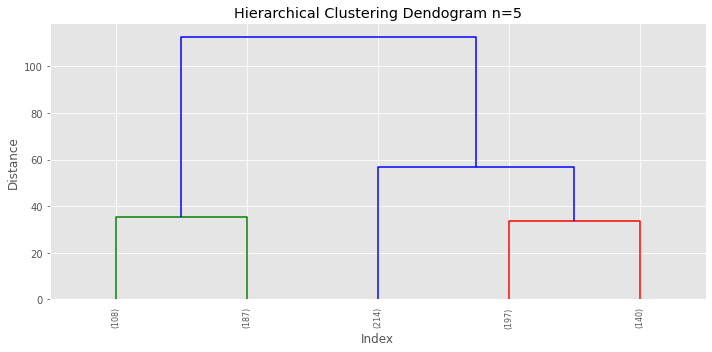

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendogram n=5')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, p=5, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

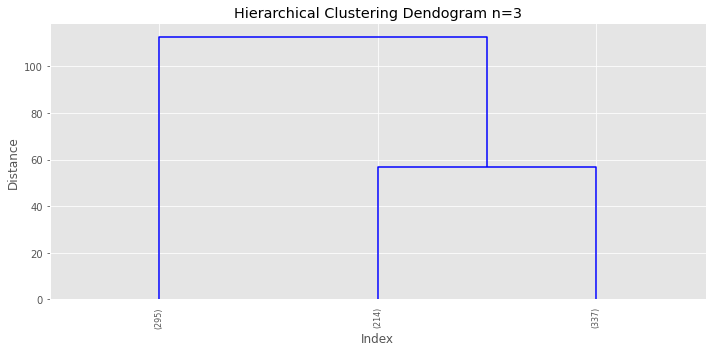

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendogram n=3')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, p=3, truncate_mode='lastp', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
vehicle['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

3-cluster dendogram seems to have given an output closer to the True Labels provided in the dataset.

#### Cluster Map with Metric = 'euclidean' 

<Figure size 1440x1440 with 0 Axes>

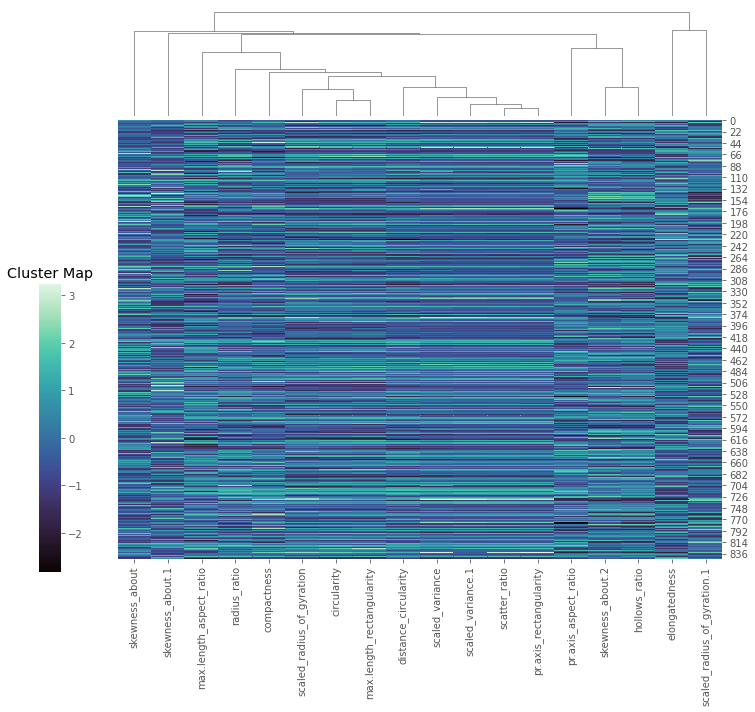

In [ ]:
plt.figure(figsize=(20,20))
sns.clustermap(vehicle_scaled, method='average', metric='euclidean', 
               dendrogram_ratio=(.1, .2), 
               cbar_pos=(0, .2, .03, .4), 
               row_cluster=False, cmap="mako")
plt.title("Cluster Map")
plt.show()

### Feature Selection Methods

In [ ]:
remove_ft_zero_corr = {'skewness_about', 'skewness_about.1', 
                       'skewness_about.2', 'compactness', 'max.length_rectangularity' }

In [ ]:
remove_ft_high_vif = {'skewness_about.2','hollows_ratio','scatter_ratio',
                      'pr.axis_rectangularity','max.length_rectangularity','circularity'}

In [ ]:
remove_ft_dendo = {'scatter_ratio', 'pr.axis_rectangularity', 'max.length_rectangularity','circularity', 'scaled_variance.1'}

In [ ]:
#Logic for dropping features: 
#Taking all the zero correlation features & intersection of high VIF and Dendogram variables.

remove_ft_cols = list(remove_ft_zero_corr.union(remove_ft_high_vif.intersection(remove_ft_dendo)))
remove_ft_cols

['skewness_about.1',
 'pr.axis_rectangularity',
 'skewness_about',
 'skewness_about.2',
 'circularity',
 'max.length_rectangularity',
 'scatter_ratio',
 'compactness']

## Step 5: Split the data into Train and Test set

#### Separating the Predictors and Target variables in X & y

In [ ]:
X = vehicle_encoded.drop(columns='class')
X_ft_subset = X.drop(columns=remove_ft_cols)
y = vehicle_encoded['class']

display(X.shape, X_ft_subset.shape, y.shape)

(846, 18)

(846, 10)

(846,)

#### Split the Train and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = random_state)

In [ ]:
X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_ft_subset, y, test_size=0.3, stratify=y, random_state = random_state)

#### View the shapes of Train and Test sets

In [ ]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(592, 18)

(254, 18)

(592,)

(254,)

## Step 6: Data Preprocessing

#### Scaling & Centering the Data

Fit using Train data and Transform both Train and Test data

In [ ]:
scaler = StandardScaler(copy=True)
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler1 = StandardScaler(copy=True)

scaler1.fit(X_train_subset)
X_train_subset = scaler1.transform(X_train_subset)
X_test_subset = scaler1.transform(X_test_subset)

## Step 7: Model Building - Training Classifier on Original Dataset

In [ ]:
def classifier_metrics(classifier, X_train, X_test):
  """
  Helper function to plot Univariate features.
  Input  : Classifier; 
  Output : Accuracy, Classification Report, Confusion Matrix, ROC AUC Curve, Precision-Recall Curve 
  """
  y_true, y_pred = y_test, classifier.predict(X_test)
  train_accuracy = classifier.score(X_train, y_train).round(3)
  test_accuracy = classifier.score(X_test, y_test).round(3)
  print("Train Accuracy : ", train_accuracy)
  print("Test Accuracy : ", test_accuracy)
  
  # Classification Report
  print("\nClassification Report")
  print('\n{}'.format(classification_report(y_true, y_pred)))
    
  # Precision Score
  clf_precision = precision_score(y_true, y_pred, average='weighted')
  print('\nPrecision Score:\n', clf_precision.round(3))
  
  # Recall Score
  clf_recall = recall_score(y_true, y_pred, average='weighted')
  print('\nRecall Score:\n', clf_recall.round(3))
  
  # F1 Score
  clf_f1 = f1_score(y_true, y_pred, average='weighted')
  print('\nF1 Score:\n', clf_f1.round(3))

   # Confusion Matrix
  clf_conf_matrix = confusion_matrix(y_true, y_pred)
  print('\nConfusion Matrix:\n')
  sns.heatmap(clf_conf_matrix, annot=True, square=True, fmt='g')

  return train_accuracy, test_accuracy, clf_conf_matrix, clf_precision, clf_recall, clf_f1

### Support Vector Machines

In [ ]:
svm_clf_rbf = SVC(kernel = 'rbf', C = 5, gamma='auto', 
                  probability=True, random_state=random_state)

In [ ]:
svm_clf_rbf.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=24, shrinking=True, tol=0.001,
    verbose=False)

Train Accuracy :  0.998
Test Accuracy :  0.976

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       0.97      0.99      0.98       129
           2       1.00      0.92      0.96        60

    accuracy                           0.98       254
   macro avg       0.98      0.97      0.97       254
weighted avg       0.98      0.98      0.98       254


Precision Score:
 0.977

Recall Score:
 0.976

F1 Score:
 0.976

Confusion Matrix:



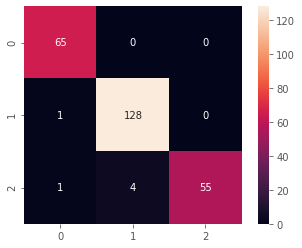

In [ ]:
svm_train_accuracy, svm_test_accuracy, svm_clf_conf_matrix, \
svm_clf_precision, svm_clf_recall, svm_clf_f1 = classifier_metrics(svm_clf_rbf, X_train, X_test)

### Running SVM with Feature Selection subset

In [ ]:
svm_clf_ft_subset = SVC(kernel = 'rbf', C = 5, gamma='auto', 
                  probability=True, random_state=random_state)

In [ ]:
svm_clf_ft_subset.fit(X_train_subset, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=24, shrinking=True, tol=0.001,
    verbose=False)

Train Accuracy :  0.981
Test Accuracy :  0.937

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       0.91      0.98      0.94       129
           2       0.96      0.78      0.86        60

    accuracy                           0.94       254
   macro avg       0.95      0.92      0.93       254
weighted avg       0.94      0.94      0.94       254


Precision Score:
 0.939

Recall Score:
 0.937

F1 Score:
 0.935

Confusion Matrix:



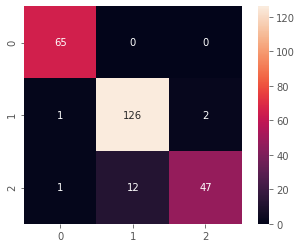

In [ ]:
svm_fs_train_accuracy, svm_fs_test_accuracy, svm_fs_clf_conf_matrix, \
svm_fs_clf_precision, svm_fs_clf_recall, svm_fs_clf_f1 = classifier_metrics(svm_clf_ft_subset, X_train_subset, X_test_subset)

### Hyperparameter Tuning for Support Vector Machines Classifier



SVC - Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 10, 'kernel': 'rbf'}
Best Score is:  0.971
SVC accuracy for train set: 0.998
SVC accuracy for test set: 0.972
SVC cross validation training score (Mean):  0.97
SVC cross validation training score(Std Dev):  0.026

Accuracy Score:
 0.972

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.96      0.99      0.98       129
           2       0.98      0.92      0.95        60

    accuracy                           0.97       254
   macro avg       0.98      0.96      0.97       254
weighted avg       0.97      0.97      0.97       254


Confusion Matrix:



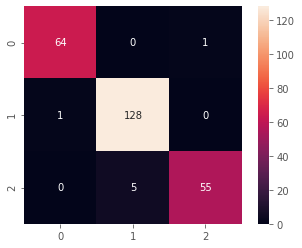

In [ ]:
svc = SVC(random_state = random_state)

param_grid = {
    'C': [0.01, 0.05, 0.5, 1, 10], 
    'kernel': ['linear', 'rbf']
    }

k = StratifiedKFold(n_splits = 10, random_state = random_state)
svc_tuned = GridSearchCV(svc, param_grid = param_grid, n_jobs = -1, cv = k)

svc_tuned.fit(X_train, y_train)

print('SVC - Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', svc_tuned.best_params_)
print('Best Score is: ', svc_tuned.best_score_.round(3))

print('SVC accuracy for train set: {0:.3f}'.format(svc_tuned.score(X_train, y_train)))
print('SVC accuracy for test set: {0:.3f}'.format(svc_tuned.score(X_test, y_test)))

y_true, y_pred = y_test, svc_tuned.predict(X_test)

# Cross Validation Score
svc_cv_score = cross_val_score(svc_tuned, X_train, y_train, cv = k, scoring = 'f1_macro')
print('SVC cross validation training score (Mean): ', round(svc_cv_score.mean(), 3).astype(str))
print('SVC cross validation training score(Std Dev): ', round(svc_cv_score.std(), 3).astype(str))

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n')
sns.heatmap(cm, annot=True, square=True, fmt='g')

95.0 confidence interval 91.9% and 100.0%


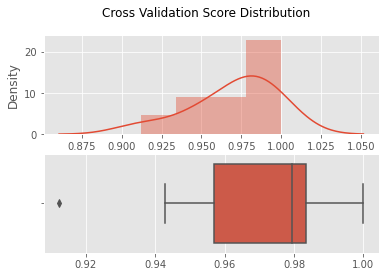

In [ ]:
plt.subplot(211)
sns.distplot(svc_cv_score)

plt.subplot(212)
sns.boxplot(svc_cv_score)

plt.suptitle("Cross Validation Score Distribution")

# Confidence Interval of 95%
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100             
lower = max(0.0, np.percentile(svc_cv_score, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(svc_cv_score, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

plt.show()

### Model Summary on Original Dataset with all dimensions

- SVC with RBF Kernel: (18 Features) 
  - Accuracy of 0.976; F1-Score of 0.97
- SVC with RBF Kernel - with Feature selection (subset): (10 Features)
  - Accuracy of 0.937, F1-Score of 0.935
SVC with Hyperparameters Tuned : 
  - Best Estimators: {'C': 10, 'kernel': 'rbf'
  - Accuracy of 0.972 and F1-Score of 0.97.
  - Cross Validation Score of 0.97 with Standard Deviation of 0.026
- We can say that the Accuracy of the model will be in the range of 92% to 100% with a Confidence Level of 95%. 

## Step 8: Dimensionality Reduction using PCA

### PCA using Numpy Linear Algebra

#### Deriving the Covariance Matrix

In [ ]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n\n', cov_matrix)

Covariance Matrix 

 [[ 1.00169205  0.70384257  0.78793301  0.69515105  0.17777693  0.46568522
   0.80927761 -0.78411489  0.81126223  0.69202696  0.76431661  0.80293012
   0.59942601 -0.20131601  0.21745833  0.10647238  0.25507063  0.3252028 ]
 [ 0.70384257  1.00169205  0.80230625  0.63295072  0.17710321  0.49790038
   0.862976   -0.82878456  0.86030376  0.9663426   0.81560884  0.84413996
   0.93604902  0.1104525   0.1606162  -0.04853525 -0.14325421  0.01364418]
 [ 0.78793301  0.80230625  1.00169205  0.78493408  0.23973677  0.60524329
   0.91050358 -0.91365403  0.89846013  0.77490982  0.87195737  0.88971373
   0.70877152 -0.18313709  0.10541912  0.2427211   0.09400659  0.28884908]
 [ 0.69515105  0.63295072  0.78493408  1.00169205  0.65408526  0.39828234
   0.75727193 -0.81574595  0.72973364  0.56983781  0.78169609  0.75188994
   0.54431633 -0.35870427  0.04735674  0.15218186  0.36200041  0.4546708 ]
 [ 0.17777693  0.17710321  0.23973677  0.65408526  1.00169205  0.11473141
   0.17533937

#### Eigen Decomposition of Covariance Matrix

In [ ]:
# Eigen values and vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n\n', eig_vecs)
print('\n Eigen Values \n\n', eig_vals)

Eigen Vectors 

 [[-2.72528544e-01 -9.29498265e-02  7.71131278e-02  1.29257962e-01
  -1.24301049e-01 -2.52402025e-01  2.96400311e-01 -7.38711140e-01
   3.50294660e-01 -1.39589730e-02 -1.81891694e-01  4.65595080e-03
  -1.21733016e-02  1.01905701e-02 -8.07260484e-02 -7.54590083e-02
   1.13468734e-01  1.96016523e-02]
 [-2.93374004e-01  1.14748957e-01  1.93306840e-01 -3.10179694e-02
   1.28528822e-01  2.87285987e-02 -3.94536504e-01 -7.72864078e-02
   4.25385068e-02 -1.18281711e-01  8.63927721e-02  2.38093221e-03
  -8.22652079e-02  7.57412598e-01  2.25419489e-01 -1.29334534e-01
   3.36916514e-02 -1.05214635e-01]
 [-3.03356224e-01 -5.68235833e-02 -8.15387622e-02  1.09196654e-01
   6.19130656e-02  8.66867579e-03  9.67734645e-02  2.83108536e-01
   1.08068359e-01 -4.09499902e-01 -5.40131046e-01 -4.44360657e-01
  -4.91819112e-03 -2.64840463e-02  8.26936544e-02  5.67558508e-03
  -3.39738455e-01  3.41253266e-02]
 [-2.64478575e-01 -2.10875195e-01 -7.21664220e-02 -2.70164182e-01
  -7.54171339e-02  1

### Scree Plot for Explained Variance vs Principal Components

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.46969912  72.43566237  79.26130191  85.59780558  90.51723353
  94.19582627  96.0534425   97.33575527  97.99834671  98.48634
  98.94200707  99.28206609  99.47997883  99.66143748  99.8030998
  99.91420813  99.98344017 100.        ]


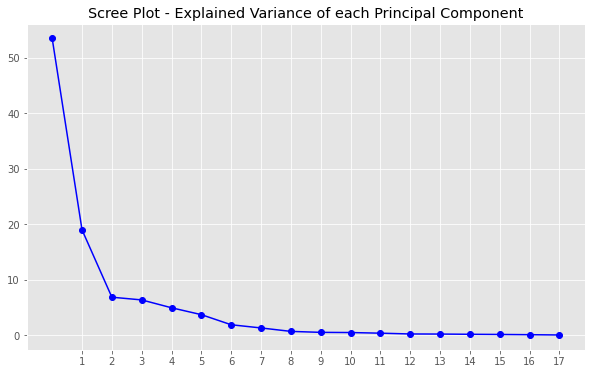

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(var_exp, '-bo')
plt.title('Scree Plot - Explained Variance of each Principal Component')
plt.xticks(ticks=range(1,18))
plt.show()

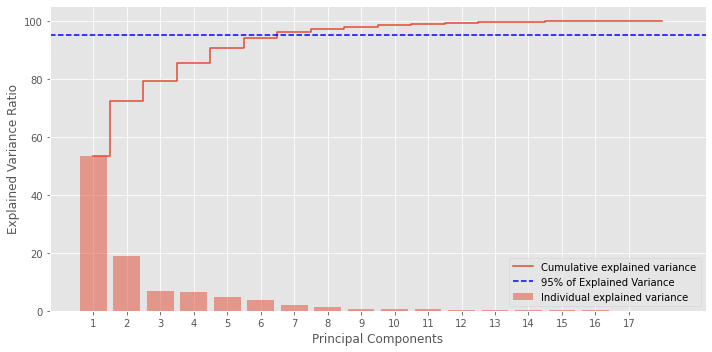

In [ ]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.axhline(y = 95, color = 'b', linestyle = '--', label='95% of Explained Variance')
plt.xticks(ticks=range(1,18))
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Observations from the Principal Component Analysis:
- Original dataset had 18 dimensions (features).
- PCA is applied and for our analysis, we derived the Eigen Decomposition of Covariance Matrix.
- Scree Plot is plotted with Principal Components and their corresponding Explained Variance.
- We can see that around 95% of the variance in original dataset is explained by 6 components, whereas around 98% of the variance is explained by 8 components.
- We can also see that the first 2 Principal Components alone explain around 75% of the variance.

### PCA using Scikit-Learn

Based on the Scree Plot, let us consider 6 dimensions for further analysis (reduced from original 12 dimensions)

In [ ]:
# Reducing the dimensions from 18 to 2, 6 & 8
pca2 = PCA(n_components=2, svd_solver='full', random_state=random_state)
pca6 = PCA(n_components=6, svd_solver='full', random_state=random_state)
pca8 = PCA(n_components=8, svd_solver='full', random_state=random_state)

In [ ]:
X_train_reduced2 = pca2.fit_transform(X_train)
X_test_reduced2 = pca2.transform(X_test)
display(X_train_reduced2.shape, X_test_reduced2.shape)

(592, 2)

(254, 2)

In [ ]:
X_train_reduced6 = pca6.fit_transform(X_train)
X_test_reduced6 = pca6.transform(X_test)
display(X_train_reduced6.shape, X_test_reduced6.shape)

(592, 6)

(254, 6)

In [ ]:
X_train_reduced8 = pca8.fit_transform(X_train)
X_test_reduced8 = pca8.transform(X_test)
display(X_train_reduced8.shape, X_test_reduced8.shape)

(592, 8)

(254, 8)

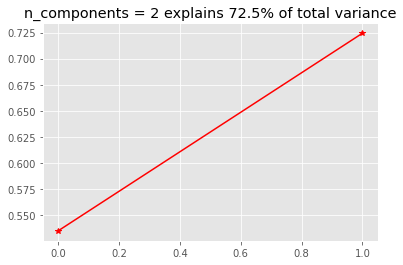

In [ ]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_), 'r-*')
plt.title('n_components = 2 explains 72.5% of total variance')
plt.show()

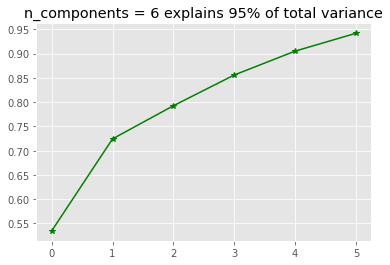

In [ ]:
plt.plot(np.cumsum(pca6.explained_variance_ratio_), 'g-*')
plt.title('n_components = 6 explains 95% of total variance')
plt.show()

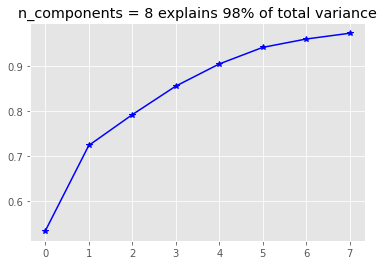

In [ ]:
plt.plot(np.cumsum(pca8.explained_variance_ratio_), 'b-*')
plt.title('n_components = 8 explains 98% of total variance')
plt.show()

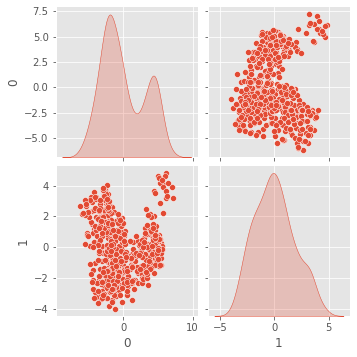

In [ ]:
sns.pairplot(pd.DataFrame(X_train_reduced2), diag_kind = 'kde')

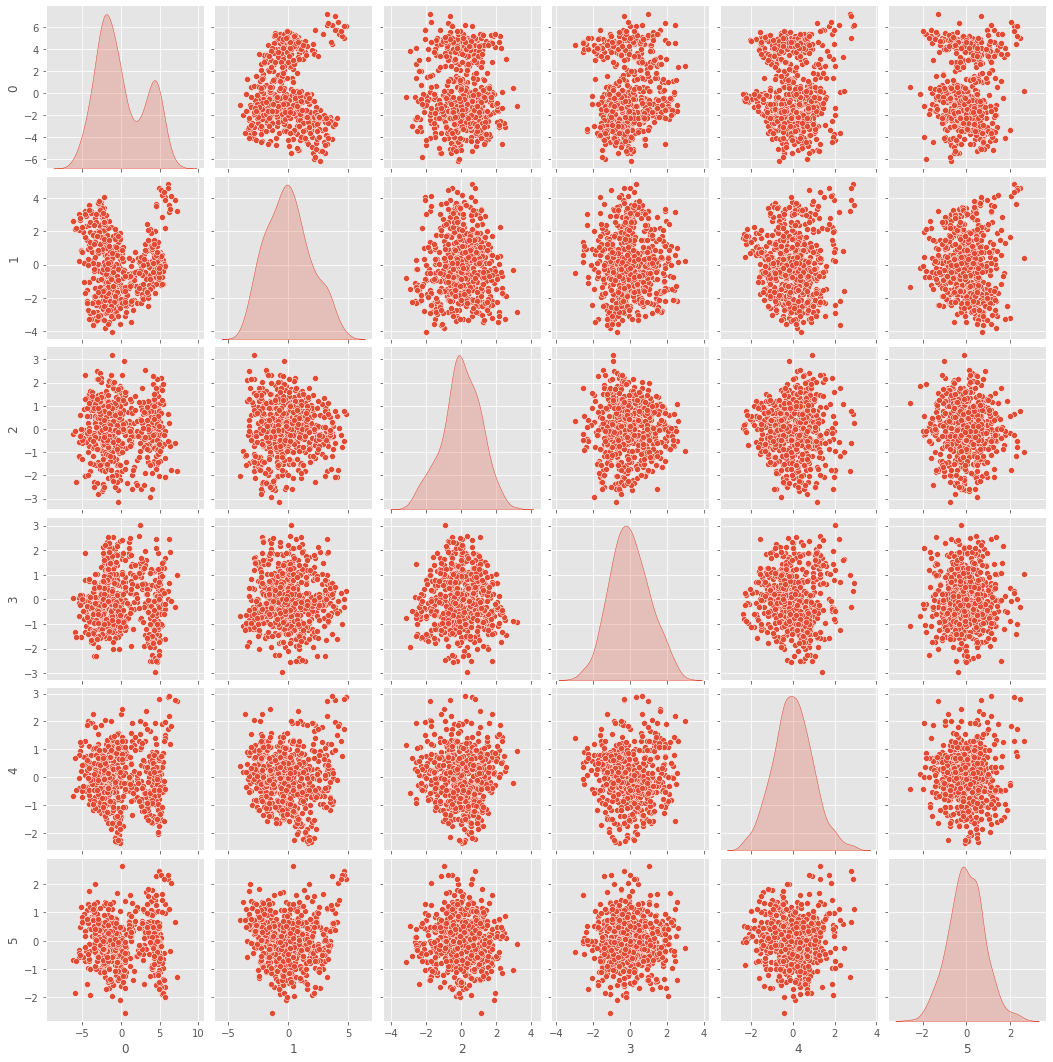

In [ ]:
sns.pairplot(pd.DataFrame(X_train_reduced6), diag_kind = 'kde')

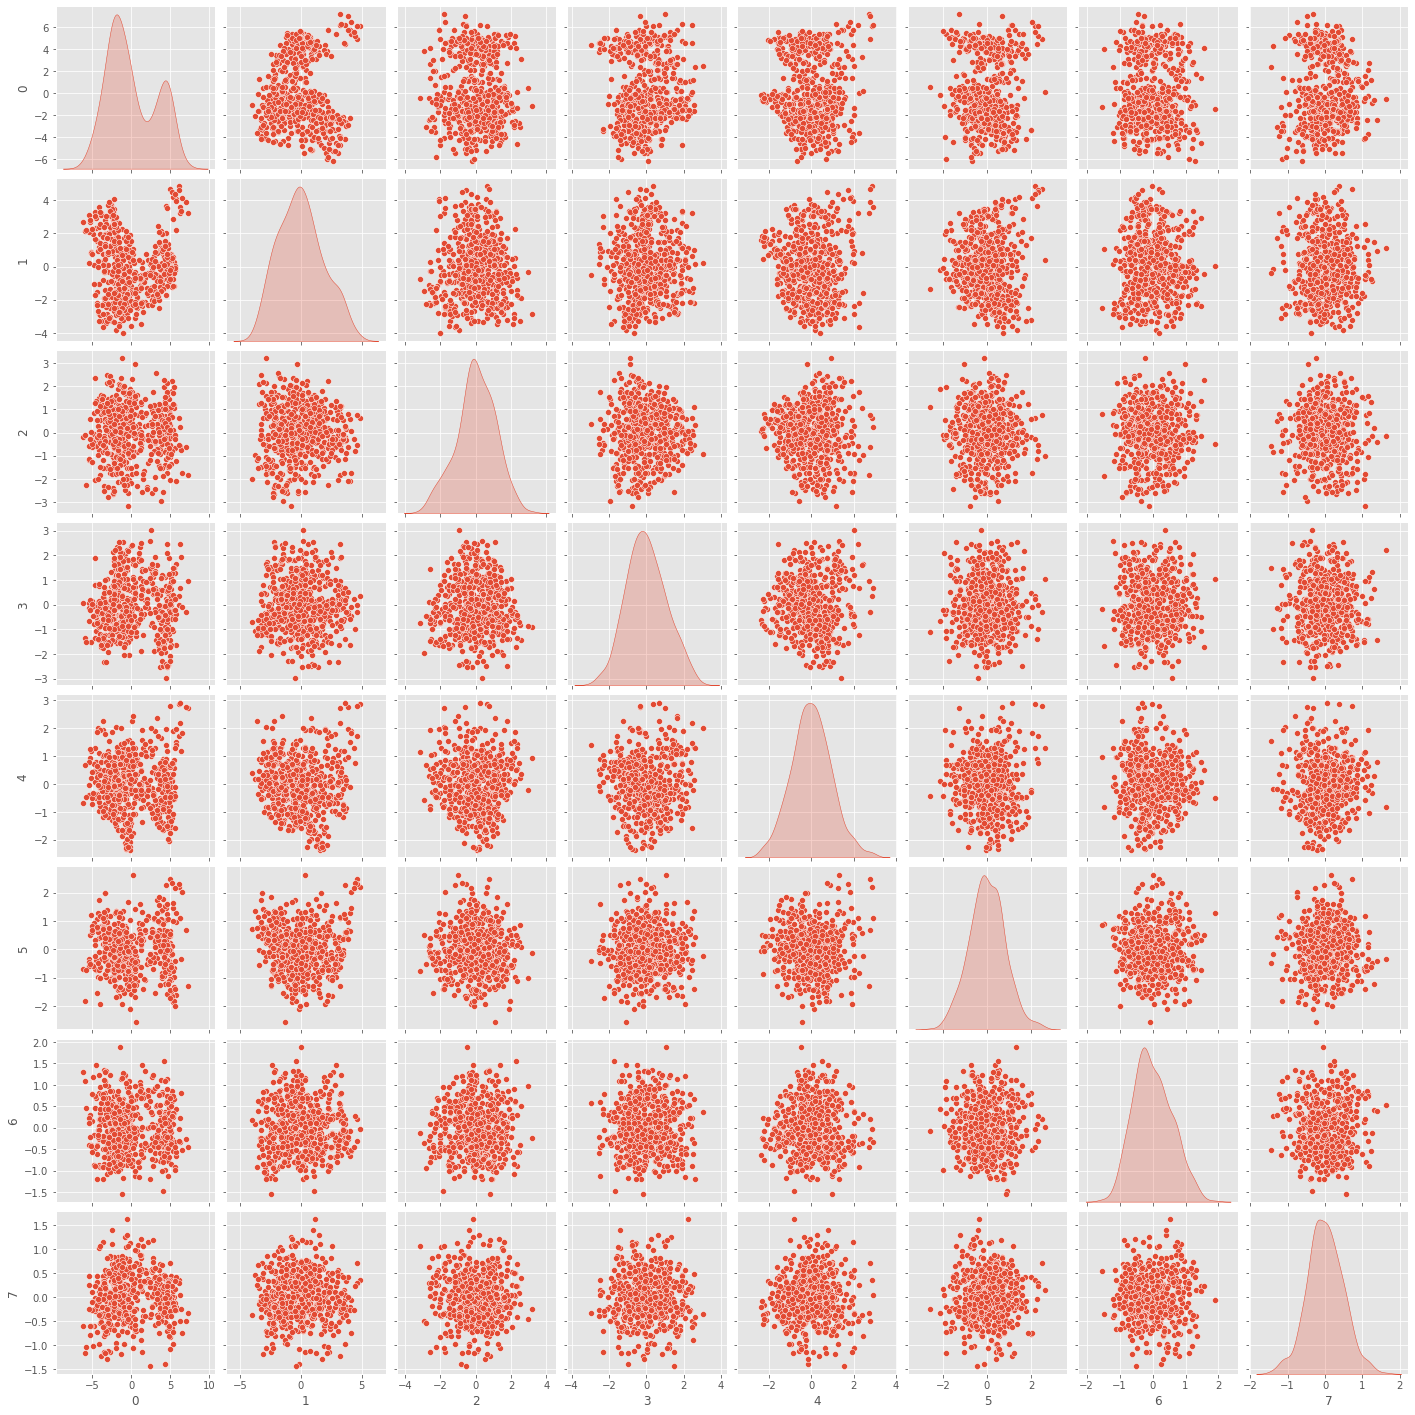

In [ ]:
sns.pairplot(pd.DataFrame(X_train_reduced8), diag_kind = 'kde')

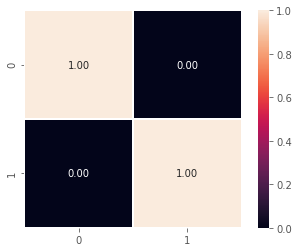

In [ ]:
sns.heatmap(pd.DataFrame(X_train_reduced2).corr(), annot=True, square=True, fmt='.2f', linewidths=0.2);

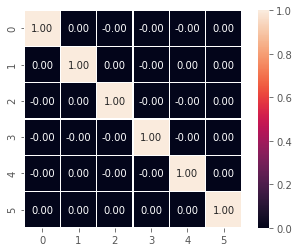

In [ ]:
sns.heatmap(pd.DataFrame(X_train_reduced6).corr(), annot=True, square=True, fmt='.2f', linewidths=0.2);

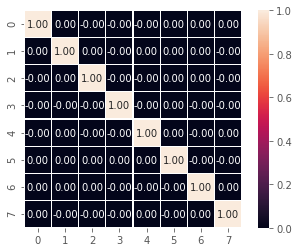

In [ ]:
sns.heatmap(pd.DataFrame(X_train_reduced8).corr(), annot=True, square=True, fmt='.2f', linewidths=0.2);

#### Observations:
- From the Pairplot & Correlation Matrix of Principal Components, we can clearly see that post Projection of our dataset along Principal Component axes, **none of the columns are highly correlated with each other**. 
- All the correlation values dropped to near zero figures.

## Step 9: Model Building on Dataset with Reduced Dimensions

In [ ]:
def classifier_metrics_pca(classifier, X_train_reduced, X_test_reduced):
  """
  Helper function to plot Univariate features.
  Input  : Classifier; Xs
  Output : Accuracy, Classification Report, Confusion Matrix, ROC AUC Curve, Precision-Recall Curve 
  """
  y_true, y_pred = y_test, classifier.predict(X_test_reduced)
  train_accuracy = classifier.score(X_train_reduced, y_train).round(3)
  test_accuracy = classifier.score(X_test_reduced, y_test).round(3)
  print("Train Accuracy : ", train_accuracy)
  print("Test Accuracy : ", test_accuracy)
  
  # Classification Report
  print("\nClassification Report")
  print('\n{}'.format(classification_report(y_true, y_pred)))
    
  # Precision Score
  clf_precision = precision_score(y_true, y_pred, average='weighted')
  print('\nPrecision Score:\n', clf_precision.round(3))
  
  # Recall Score
  clf_recall = recall_score(y_true, y_pred, average='weighted')
  print('\nRecall Score:\n', clf_recall.round(3))
  
  # F1 Score
  clf_f1 = f1_score(y_true, y_pred, average='weighted')
  print('\nF1 Score:\n', clf_f1.round(3))

   # Confusion Matrix
  clf_conf_matrix = confusion_matrix(y_true, y_pred)
  print('\nConfusion Matrix:\n')
  sns.heatmap(clf_conf_matrix, annot=True, square=True, fmt='g')

  return train_accuracy, test_accuracy, clf_conf_matrix, clf_precision, clf_recall, clf_f1

### Support Vector Machines

#### PCA with 2 components:

In [ ]:
svm_clf_pca2 = SVC(kernel = 'rbf', C = 5, gamma='auto', 
                  probability=True, random_state=random_state)

In [ ]:
svm_clf_pca2.fit(X_train_reduced2, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=24, shrinking=True, tol=0.001,
    verbose=False)

Train Accuracy :  0.764
Test Accuracy :  0.709

Classification Report

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        65
           1       0.74      0.80      0.77       129
           2       0.69      0.48      0.57        60

    accuracy                           0.71       254
   macro avg       0.70      0.67      0.68       254
weighted avg       0.71      0.71      0.70       254


Precision Score:
 0.707

Recall Score:
 0.709

F1 Score:
 0.703

Confusion Matrix:



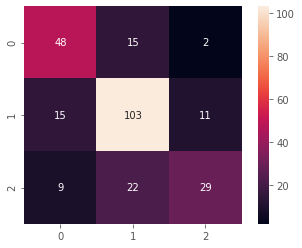

In [ ]:
svm_train_accuracy_pca2, svm_test_accuracy_pca2, svm_clf_conf_matrix_pca2, \
svm_clf_precision_pca2, svm_clf_recall_pca2, svm_clf_f1_pca2 = classifier_metrics_pca(svm_clf_pca2, X_train_reduced2, X_test_reduced2)

#### PCA with 6 components:

In [ ]:
svm_clf_pca6 = SVC(kernel = 'rbf', C = 5, gamma='auto', 
                  probability=True, random_state=random_state)

In [ ]:
svm_clf_pca6.fit(X_train_reduced6, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=24, shrinking=True, tol=0.001,
    verbose=False)

Train Accuracy :  0.985
Test Accuracy :  0.917

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.92      0.93      0.93       129
           2       0.88      0.87      0.87        60

    accuracy                           0.92       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.92      0.92      0.92       254


Precision Score:
 0.917

Recall Score:
 0.917

F1 Score:
 0.917

Confusion Matrix:



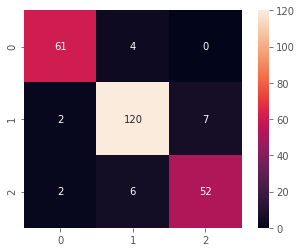

In [ ]:
svm_train_accuracy_pca6, svm_test_accuracy_pca6, svm_clf_conf_matrix_pca6, \
svm_clf_precision_pca6, svm_clf_recall_pca6, svm_clf_f1_pca6 = classifier_metrics_pca(svm_clf_pca6, X_train_reduced6, X_test_reduced6)

#### PCA with 8 components:

In [ ]:
svm_clf_pca8 = SVC(kernel = 'rbf', C = 5, gamma='auto', 
                  probability=True, random_state=random_state)

In [ ]:
svm_clf_pca8.fit(X_train_reduced8, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=24, shrinking=True, tol=0.001,
    verbose=False)

Train Accuracy :  0.993
Test Accuracy :  0.937

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.92      0.95      0.94       129
           2       0.93      0.87      0.90        60

    accuracy                           0.94       254
   macro avg       0.94      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254


Precision Score:
 0.937

Recall Score:
 0.937

F1 Score:
 0.937

Confusion Matrix:



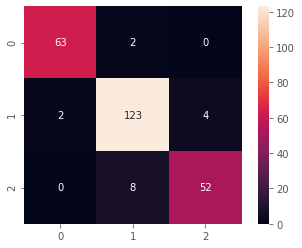

In [ ]:
svm_train_accuracy_pca8, svm_test_accuracy_pca8, svm_clf_conf_matrix_pca8, \
svm_clf_precision_pca8, svm_clf_recall_pca8, svm_clf_f1_pca8 = classifier_metrics_pca(svm_clf_pca8, X_train_reduced8, X_test_reduced8)

### Hyperparameter Tuning for Support Vector Machines Classifier

SVC - Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 10, 'kernel': 'rbf'}
Best Score is:  0.938
SVC accuracy for train set: 0.988
SVC accuracy for test set: 0.945
SVC cross validation training score (Mean):  0.928
SVC cross validation training score (Std Dev):  0.031

Accuracy Score:
 0.945

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.93      0.96      0.95       129
           2       0.93      0.88      0.91        60

    accuracy                           0.94       254
   macro avg       0.95      0.94      0.94       254
weighted avg       0.95      0.94      0.94       254


Confusion Matrix:



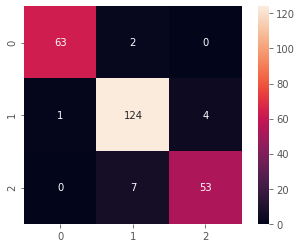

In [ ]:
svc = SVC(random_state = random_state)

param_grid = {
    'C': [0.01, 0.05, 0.5, 1, 10, 100], 
    'kernel': ['linear', 'rbf']
    }

k = StratifiedKFold(n_splits = 10, random_state = random_state)
svc_reduced_tuned = GridSearchCV(svc, param_grid = param_grid, n_jobs = -1, cv = k)

svc_reduced_tuned.fit(X_train_reduced8, y_train)

print('SVC - Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', svc_reduced_tuned.best_params_)
print('Best Score is: ', svc_reduced_tuned.best_score_.round(3))

print('SVC accuracy for train set: {0:.3f}'.format(svc_reduced_tuned.score(X_train_reduced8, y_train)))
print('SVC accuracy for test set: {0:.3f}'.format(svc_reduced_tuned.score(X_test_reduced8, y_test)))

y_true, y_pred = y_test, svc_reduced_tuned.predict(X_test_reduced8)

# Cross Validation Score
svc_reduced_cv_score = cross_val_score(svc_reduced_tuned, X_train_reduced8, y_train, cv = k, scoring = 'f1_macro')
print('SVC cross validation training score (Mean): ', round(svc_reduced_cv_score.mean(), 3).astype(str))
print('SVC cross validation training score (Std Dev): ', round(svc_reduced_cv_score.std(), 3).astype(str))

# Accuracy Score
acc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', acc.round(3))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n')
sns.heatmap(cm, annot=True, square=True, fmt='g')

95.0 confidence interval 88.2% and 97.9%


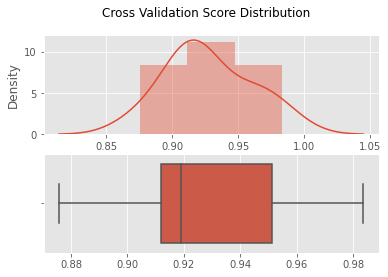

In [ ]:
plt.subplot(211)
sns.distplot(svc_reduced_cv_score)

plt.subplot(212)
sns.boxplot(svc_reduced_cv_score)

plt.suptitle("Cross Validation Score Distribution")

# Confidence Interval of 95%
alpha = 0.95                             
p = ((1.0-alpha)/2.0) * 100             
lower = max(0.0, np.percentile(svc_reduced_cv_score, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(svc_reduced_cv_score, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

plt.show()

#### Observations:
- PCA with 2 components:
  - Accuracy of 0.71
- PCA with 6 components:
  - Accuracy of 0.917
- PCA with 8 components:
  - Accuracy of 0.937
- PCA with 8 Components - Hyperparameters Tuned:
  - Cross Validation Score of 0.908 with Standard Deviation of 0.031
- We can say that the Accuracy of the model will be in the range of 88% to 98% with a Confidence Level of 95%. 
- It should be noted that PCA with 8 components has an Accuracy of 0.937 which is very similar to the Model with manual Feature Selection (Accuracy of 0.937). 
- Hence, we can say that **PCA is able to provide the Feature Extraction with the same level of performance as that of manual Feature Selection.**

## Step 10: Model Comparison - All-Dimensions vs Reduced-Dimensions

#### Cross Validation Score Comparison: All-Dimensions vs Reduced

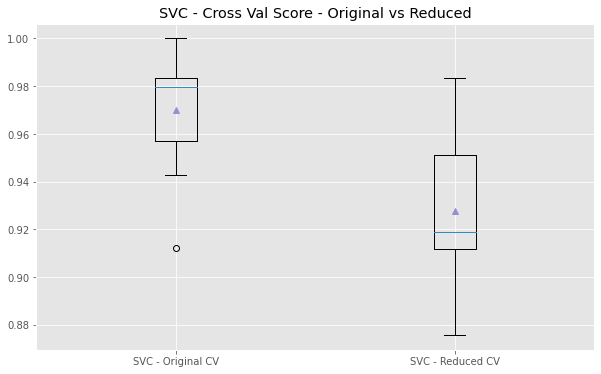

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([svc_cv_score, svc_reduced_cv_score],
            showmeans=True,
            labels=['SVC - Original CV','SVC - Reduced CV'])
plt.title('SVC - Cross Val Score - Original vs Reduced')
plt.show()

#### Hypothesis Testing validation to compare All-Dimensions vs Reduced

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [ ]:
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=svc_tuned, 
                          estimator2=svc_reduced_tuned, 
                          X=X, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)

print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset.\nWe may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis.\n We may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.387
The t-statistics is = -0.948
Since p>0.05, we cannot reject the null hypothesis.
 We may conclude that the performance of the two algorithms is not significantly different.


#### Plotting the Learning Curve for both the models

In [ ]:
def plot_learning_curve(estimator, X, y,  ax, ylim = None, cv = None, n_jobs = 1,
                        train_sizes = np.linspace(.1, 1.0, 5), name = 'SVC PC Learning Curve'):    
    if ylim is not None:
        plt.ylim(*ylim)
        
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, 
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha = 0.1, color = '#ff9124')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha = 0.1, color = '#2492ff')

    ax.plot(train_sizes, train_scores_mean, 'o-', color = '#ff9124', label = 'Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color ='#2492ff', label = 'Cross-validation score')
    ax.set_title(name, fontsize = 14)
    ax.set_xlabel('Training size')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc = 'best')

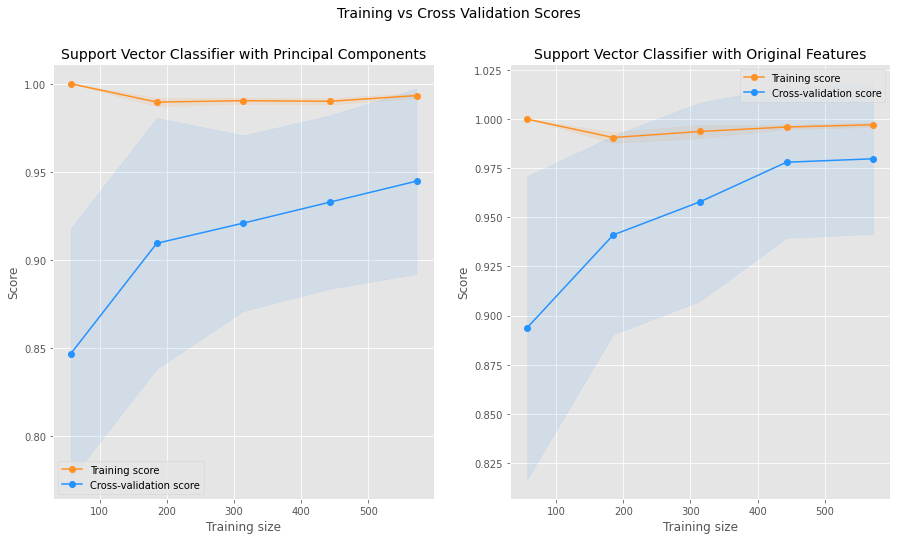

In [ ]:
# Plot training vs cross validation scores
cv = StratifiedKFold(n_splits = 30, random_state = random_state)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (15, 8))
f.suptitle('Training vs Cross Validation Scores', fontsize = 14)

plot_learning_curve(svm_clf_pca8, X_train_reduced8, y_train, cv = cv, n_jobs = -1, ax = ax1, 
                    name = 'Support Vector Classifier with Principal Components')

plot_learning_curve(svm_clf_rbf, X_train, y_train, cv = cv, n_jobs = 1, ax = ax2,
                    name = 'Support Vector Classifier with Original Features')

We can see that the Learning Curve of Principal Components (reduced dataset) is smooth and able to achieve the threshold point with training size of 200, (against 400 for Original features).

### Classifier Metrics Comparison for Original vs Reduced Data Models

In [ ]:
metrics = {'Classifier':['SVC-All-Dimensions',
                         'SVC-Feature-Selected',
                         'SVC-PCA-2-Dimensions',
                         'SVC-PCA-6-Dimensions',
                         'SVC-PCA-8-Dimensions'],
           'Accuracy' : [svm_test_accuracy,
                         svm_fs_test_accuracy,
                         svm_test_accuracy_pca2,
                         svm_test_accuracy_pca6,
                         svm_test_accuracy_pca8],
           'Precision':[svm_clf_precision,
                        svm_fs_clf_precision,
                        svm_clf_precision_pca2,
                        svm_clf_precision_pca6,
                        svm_clf_precision_pca8],
           'Recall':[svm_clf_recall,
                     svm_fs_clf_recall,
                     svm_clf_recall_pca2,
                     svm_clf_recall_pca6,
                     svm_clf_recall_pca8], 
           'F1-Score':[svm_clf_f1,
                       svm_fs_clf_f1,
                       svm_clf_f1_pca2,
                       svm_clf_f1_pca6,
                       svm_clf_f1_pca8]
          }
model_eval_metrics = pd.DataFrame(metrics)
model_eval_metrics = model_eval_metrics.set_index('Classifier')

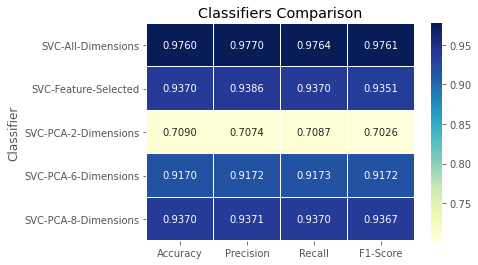

In [ ]:
sns.heatmap(model_eval_metrics, annot=True, fmt='.4f', linewidths=0.3, cmap='YlGnBu')
plt.title("Classifiers Comparison")
plt.show()

SVC- Feature Selected has the similar Performance values as that of SVC-PCA with 8 components.



## Learnings & Summary
**Statistical Summary and Initial EDA:**

- Given Dataset contains data about the Silhouette Scores of different vehicles and the task is about classifying the records into one of the three classes - Car, Van or Bus. 
- In addition, we will also check the effect of Dimensionality Reduction with Principal Component Analysis and compare the performance across models.
- From the initial Statistical Summary we can see that the dataset has 18 predictor variables (18-dimensions) and 1 target variable. All the predictor features are of numeric datatype. Target column is non-numeric. 
- Features `compactness`, `max.length_aspect_ratio`, `max.length_rectangularity`, `hollows_ratio`, `class` have missing values. All other features doesn't have any missing data. 
- `scaled_variance.1` and `skewness_about.1` seems to have high variability based on their Mean and Standard Deviation values.

**Univariate Analysis:**
- `compactness`, `circularity` and `skewness_about.2` seems to be Normally distributed based on the Mean and Median values. All other features seems to exhibit skewness. 
- `max.length_aspect_ratio`, `pr.axis_aspect_ratio` and `scaled_radius_of_gyration.1` are the features with maximum skewness. 
- We went on to visualize the target variable `class` and observed that the three classes are not balanced. 'Car' is the majority class with 50% of the total values whereas 'Bus' has 26% and 'Van' has 24% distribution.

**Multivariate Analysis:**
- All the features are plotted against the target variable `class`. 
- From the Pairplot and Correlation Matrix, list of variables with high correlation among independent variables, variables with high correlation with target variable are identified. 
- We have also observed that most of the features are highly correlated with each other, exhibiting Multicollinearity. 

**Unsupervised Learning Methods for EDA:**
- Hierarchical clustering is implemented on the predictor dataset and the performance of clusters is evaluated using Cophenetic Correlation coefficient. We observed that 'Average' linkage with Euclidean distance measure yielded the best Cophenetic Correlation score. 
- Dendograms with number of clusters 3 and 5 are plotted to understand the Feature Dependence among the predictor variables. We observed that 3 clusters is the ideal case for the given dataset (in line with the given target of three classes).
- Cluster Map is plotted to understand how the Features merge at different levels of Clusters. 

**Feature Engineering & Selection:**
- Log transformation is applied for all these features to minimize skewness and mitigate the number of outliers.
- Missing Values are Imputed with KNN Imputer
- Outlier Detection is done using Inter Quartile Range x 1.5 times & the same are imputed using their respective Medians (so that the change in the resulting distribution is not drastically different).
- All the features are Standardised (scaled) since we will be applying PCA.
- Feature Selection is done based on the inferences from EDA, Clustering and VIF scores. 

**Model Building - Original Features:**
- Data is split into Train and Test sets with stratify set as Yes due to preserve Class Imbalance.
- Scaling is done separately on Train and Test sets to avoid Data Leakage.
- Two different Models are built - one with all Original Features & another one with Feature Selection subset.
- In addition, Hyperparameter Tuning using GridSearch is done and Cross Validation Score is computed. 
	- SVC with RBF Kernel: (18 Features)
		- Accuracy of 0.976; F1-Score of 0.97
	- SVC with RBF Kernel - with Feature selection (subset): (10 Features)
		- Accuracy of 0.937, F1-Score of 0.935 
	- SVC with Hyperparameters Tuned :
		- Best Estimators: {'C': 10, 'kernel': 'rbf'
		- Accuracy of 0.972 and F1-Score of 0.97.
		- Cross Validation Score of 0.97 with Standard Deviation of 0.026
	- We can say that the Accuracy of the model will be in the range of 92% to 100% with a Confidence Level of 95%.

**Model Building - with Reduced Dimensions and PCA:**
- PCA is applied and for our analysis, we derived the Eigen Decomposition of Covariance Matrix.
- Scree Plot is plotted with Principal Components and their corresponding Explained Variance.
- We observed that around 95% of the variance in original dataset is explained by 6 components, whereas around 98% of the variance is explained by 8 components.
- We also observed that the first 2 Principal Components alone explain around 75% of the variance.
- Three new classifier models are built using 2, 6 and 8 Principal Components respectively. 
	- PCA with 2 components: Accuracy of 0.71
	- PCA with 6 components: Accuracy of 0.917
	- PCA with 8 components: Accuracy of 0.937
	- PCA with 8 Components - Hyperparameters Tuned:
		- Cross Validation Score of 0.908 with Standard Deviation of 0.031. We can say that the Accuracy of the model will be in the range of 88% to 98% with a Confidence Level of 95%.
	- It should be noted that PCA with 8 components has an Accuracy of 0.937 which is very similar to the Model with manual Feature Selection (Accuracy of 0.937).
	- Hence, we can say that **PCA is able to provide the Feature Extraction with the same level of performance as that of manual Feature Selection**.

**Model Comparison:**
- Paired t-test is used to compare both the models (original with reduced dimensions) and observed that PCA with 8 components has yielded similar results as that of the original model. 
- Also the Cross Validation Scores are plotted for both the models. 
- Though there is a dip in the Accuracy of model with PCA, still it comes with an added benefit of reduced dimensions (from 18 to 8), which is also similar to the manual Feature Selection model performance.
- Finally, Learning Curve of both the models are plotted and observed that the PCA model is able to achieve smoother learning curve with the bias-variance threshold reached well ahead of the original model. Hence, the PCA model will be a better option in Production environment, especially when the dimensions are on the higher side. 

--------------------------------------End of Assignment-------------------------------------------